In [37]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import numpy as np
import torch
import pandas as pd
import os
import pickle
from copy import deepcopy


from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from scipy.stats import randint
from scipy.stats import uniform
from scipy.stats import loguniform


import optuna
optuna.logging.set_verbosity(0) 


import warnings
warnings.filterwarnings('ignore')

import sys
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')



import npm_nnf.utils.utils_kernels as KT 
import npm_nnf.density_estimation.utils_density as utils
import npm_nnf.density_estimation.utils_data_generator as generators
import npm_nnf.utils.utils_train as utils_train

In [39]:
save_path = f'models/density_estimation_1d'

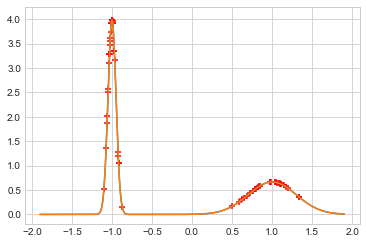

In [41]:
# Number of data points we will be using and basic parameters of the model
ndata = 60

# data generator : gaussian mixture

density_fun = generators.generateGaussianMixture([-1,1],[0.05,0.3],1)[1]

def gen(n=ndata):
    ds,_ = generators.generateGaussianMixture([-1,1],[0.05,0.3],n)
    return ds.view(n,1)

d = 1

base = 'gaussian'
mu_base,eta_base = torch.zeros((d,)),5

data_set = gen()
    
    

# Linear model

In [42]:
version = find_last_version(path = 'models/lin_model_1D',extension = 'pickle')

print(f'last model version number : {version}')

NameError: name 'find_last_version' is not defined

In [43]:
parameters = {'sigma' : [1], 'la' : np.logspace(-8,0,20),'Niter' : ['auto'] , 'eta_base' : [eta_base], 'mu_base' : [mu_base]}
X = data_set
model = utils.LinearEstimator()
clf = GridSearchCV(model, parameters)
clf.fit(X)
clf_info = {'cross_valid' : clf.cv_results_,'data_set' : data_set}
version = 1
filename = f'models/lin_model_1D_{version}.pickle'
pickle.dump(clf_info, open(filename, 'wb'))

sigma = 1, lambda = 1e-08
sigma = 1, lambda = 1e-08
sigma = 1, lambda = 1e-08
sigma = 1, lambda = 1e-08
sigma = 1, lambda = 1e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 

AttributeError: 'LMK2' object has no attribute 'constraint'

{'Niter': 'auto', 'eta_base': 5, 'la': 1e-08, 'mu_base': tensor([0.]), 'sigma': 1}
sigma = 1, lambda = 1e-08
---iteration: 1---
Finished after 30 iterations
Integral tracker values : 30,0


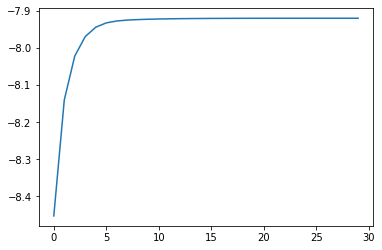

In [12]:
version = 1
filename = f'models/lin_model_1D_{version}.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
df = pd.DataFrame(loaded_model['cross_valid'])
data_set = loaded_model['data_set']
params_best = df[df['rank_test_score'] == 1].iloc[0]['params']
print(params_best)
model = utils.LinearEstimator(**params_best)
model.fit(data_set)

integral = tensor([[0.8908]])
integral = tensor([[0.8908]])


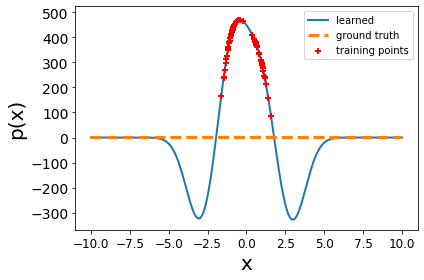

In [13]:
c,r,ntest = 0,10,100000
xtest = torch.linspace(c-r,c+r,ntest)

ytest = model.predict(xtest)
#print(ytest.sum()*(2*r)**d/ntest)
ydata_set = model.predict(data_set)
ytestref = density_fun(xtest)

fig = plt.figure()
plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
plt.scatter(data_set,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=1000)
plt.show()

# Our model

In [44]:
#Model

In [45]:
model = utils.QuadraticEstimator

In [46]:
#Data set 

In [47]:
X = data_set 

In [31]:
#Last version : 

In [32]:
last_version = utils_train.find_last_version(save_path,model = model,extension='pickle')
print(f'Last version to date : {last_version}')

Last version to date : 13


In [49]:
fixed_params = {
        #'sigma' : 1, 
            'Niter' : 'auto',
            'mu_base' : mu_base,
            'eta_base' : eta_base,
            'mu' :1e-3
           }
variable_params = {
    'sigma' : ['uniform',0.1,1],
    'la' : ['loguniform',1e-3,1e0]
}


cv = 5
prune = False
n_trials =  10


n_jobs = 1
eta = 0



sigma = 0.4103038183645419, lambda = 0.0016120477710795933, mu = 0.001
Finished after 171 iterations
Integral tracker values : 171,29


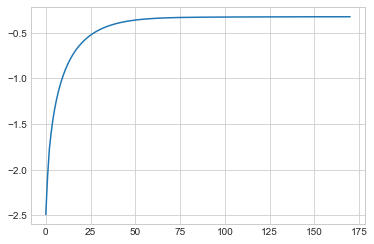

integral = 1.004101518089876
renorm size 0.13199190523546434
sigma = 0.4103038183645419, lambda = 0.0016120477710795933, mu = 0.001
Finished after 140 iterations
Integral tracker values : 140,26


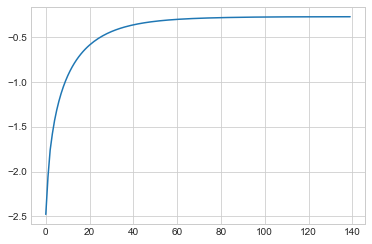

integral = 0.9994089920176116
renorm size 0.13245523462810244
sigma = 0.4103038183645419, lambda = 0.0016120477710795933, mu = 0.001
Finished after 211 iterations
Integral tracker values : 211,36


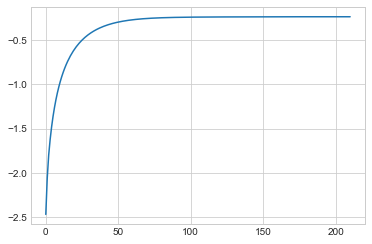

integral = 1.0061828615391826
renorm size 0.13249047686444335
sigma = 0.4103038183645419, lambda = 0.0016120477710795933, mu = 0.001
Finished after 199 iterations
Integral tracker values : 199,34


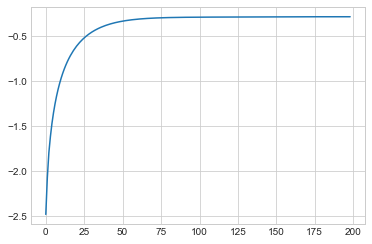

integral = 1.0061593635239898
renorm size 0.13208018684317083
sigma = 0.4103038183645419, lambda = 0.0016120477710795933, mu = 0.001
Finished after 210 iterations
Integral tracker values : 210,74


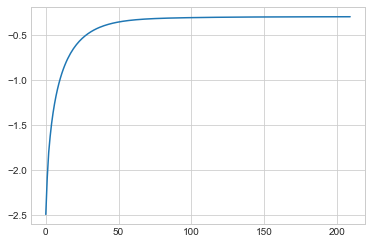

integral = 1.001017667234007
renorm size 0.13117693786523757
sigma = 0.10261950818053334, lambda = 0.07038337482419671, mu = 0.001
Finished after 775 iterations
Integral tracker values : 775,130


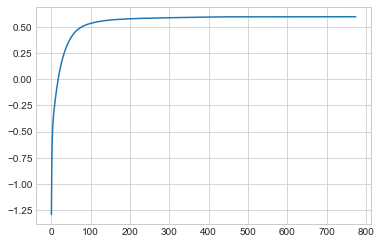

integral = 1.001130352201321
renorm size 0.042533808458088136
sigma = 0.10261950818053334, lambda = 0.07038337482419671, mu = 0.001
Finished after 370 iterations
Integral tracker values : 370,75


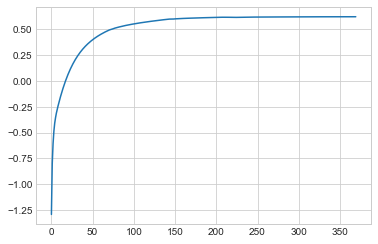

integral = 1.0002316549623635
renorm size 0.04355520229604358
sigma = 0.10261950818053334, lambda = 0.07038337482419671, mu = 0.001
Finished after 415 iterations
Integral tracker values : 415,118


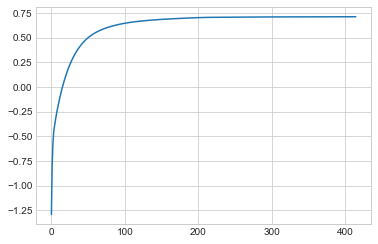

integral = 1.0019898728474
renorm size 0.043964880305534734
sigma = 0.10261950818053334, lambda = 0.07038337482419671, mu = 0.001
Finished after 770 iterations
Integral tracker values : 770,129


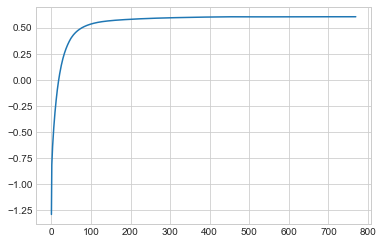

integral = 1.0034493221213787
renorm size 0.0433423690963708
sigma = 0.10261950818053334, lambda = 0.07038337482419671, mu = 0.001
Finished after 716 iterations
Integral tracker values : 716,120


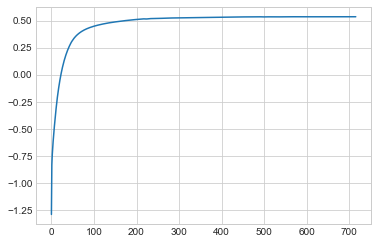

integral = 0.9980836097850471
renorm size 0.042616230235365676
sigma = 0.7254108488681784, lambda = 0.062121936099027206, mu = 0.001
Finished after 399 iterations
Integral tracker values : 399,67


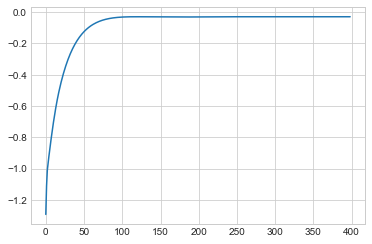

integral = 0.9930202062268151
renorm size 0.19751314761862726
sigma = 0.7254108488681784, lambda = 0.062121936099027206, mu = 0.001
Finished after 397 iterations
Integral tracker values : 397,67


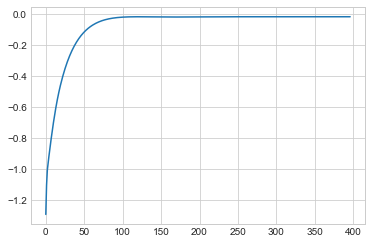

integral = 0.9954499133094736
renorm size 0.1972990800643413
sigma = 0.7254108488681784, lambda = 0.062121936099027206, mu = 0.001
Finished after 399 iterations
Integral tracker values : 399,67


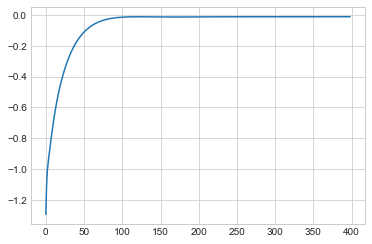

integral = 0.9954888307927173
renorm size 0.1974767429702851
sigma = 0.7254108488681784, lambda = 0.062121936099027206, mu = 0.001
Finished after 399 iterations
Integral tracker values : 399,67


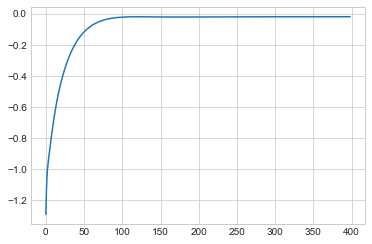

integral = 0.9942418807543107
renorm size 0.19731386638973836
sigma = 0.7254108488681784, lambda = 0.062121936099027206, mu = 0.001
Finished after 394 iterations
Integral tracker values : 394,66


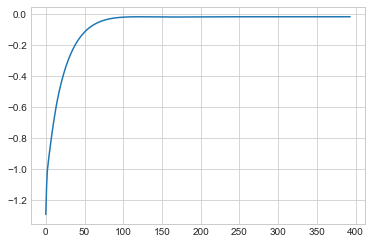

integral = 0.9956649162788814
renorm size 0.1956952525496055
sigma = 0.5987140957341975, lambda = 0.02356749795205065, mu = 0.001
Finished after 352 iterations
Integral tracker values : 352,59


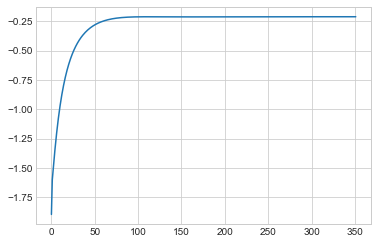

integral = 0.9965828469586894
renorm size 0.17157796631290395
sigma = 0.5987140957341975, lambda = 0.02356749795205065, mu = 0.001
Finished after 245 iterations
Integral tracker values : 245,41


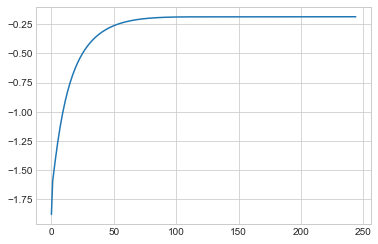

integral = 1.0068730658383669
renorm size 0.17175665465170484
sigma = 0.5987140957341975, lambda = 0.02356749795205065, mu = 0.001
Finished after 236 iterations
Integral tracker values : 236,40


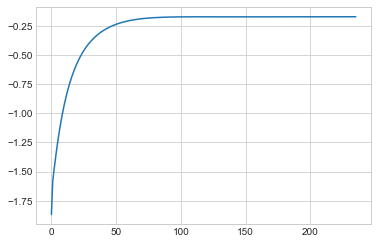

integral = 1.007369709115619
renorm size 0.17208209793487614
sigma = 0.5987140957341975, lambda = 0.02356749795205065, mu = 0.001
Finished after 248 iterations
Integral tracker values : 248,42


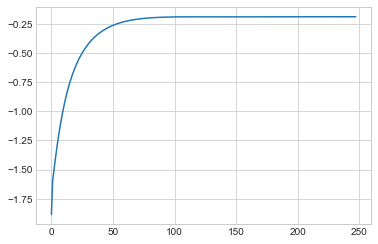

integral = 1.0093029286740023
renorm size 0.1719723969950658
sigma = 0.5987140957341975, lambda = 0.02356749795205065, mu = 0.001
Finished after 244 iterations
Integral tracker values : 244,41


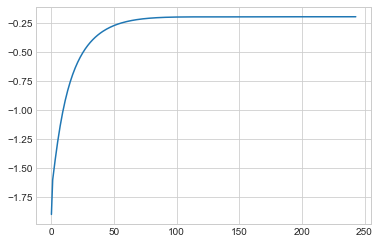

integral = 1.0087924357039684
renorm size 0.17058826198181015
sigma = 0.8527515846955178, lambda = 0.027061976755727846, mu = 0.001
Finished after 397 iterations
Integral tracker values : 397,67


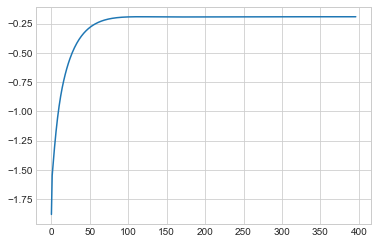

integral = 0.9918009144123259
renorm size 0.2211290628627584
sigma = 0.8527515846955178, lambda = 0.027061976755727846, mu = 0.001
Finished after 397 iterations
Integral tracker values : 397,67


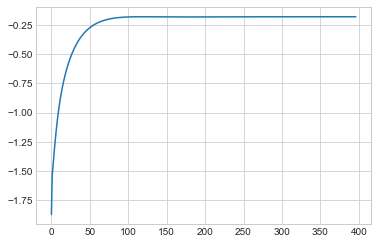

integral = 0.9935459666668615
renorm size 0.2210940184686797
sigma = 0.8527515846955178, lambda = 0.027061976755727846, mu = 0.001
Finished after 397 iterations
Integral tracker values : 397,67


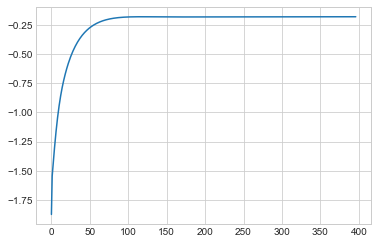

integral = 0.9939507828035264
renorm size 0.22147460435860203
sigma = 0.8527515846955178, lambda = 0.027061976755727846, mu = 0.001
Finished after 395 iterations
Integral tracker values : 395,66


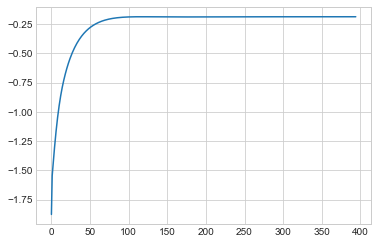

integral = 0.9930357470066278
renorm size 0.2214506881123698
sigma = 0.8527515846955178, lambda = 0.027061976755727846, mu = 0.001
Finished after 394 iterations
Integral tracker values : 394,66


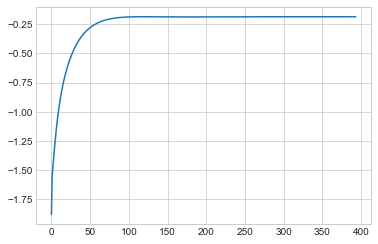

integral = 0.9940727653944704
renorm size 0.22080526923411387
sigma = 0.10986640514268109, lambda = 0.08478270380964249, mu = 0.001
Finished after 854 iterations
Integral tracker values : 854,143


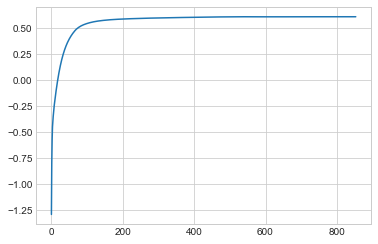

integral = 1.0006957946808517
renorm size 0.04485826581466699
sigma = 0.10986640514268109, lambda = 0.08478270380964249, mu = 0.001
Finished after 457 iterations
Integral tracker values : 457,77


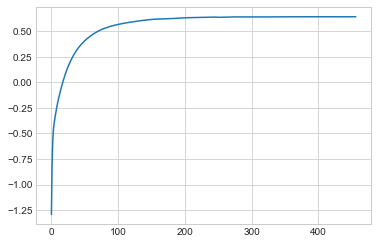

integral = 1.000308562015174
renorm size 0.0458495031542712
sigma = 0.10986640514268109, lambda = 0.08478270380964249, mu = 0.001
Finished after 435 iterations
Integral tracker values : 435,90


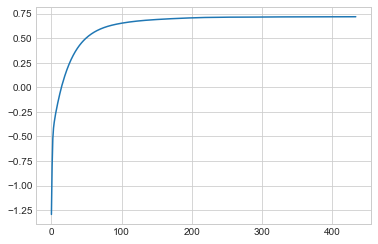

integral = 1.0014607772693453
renorm size 0.04631129354558746
sigma = 0.10986640514268109, lambda = 0.08478270380964249, mu = 0.001
Finished after 560 iterations
Integral tracker values : 560,454


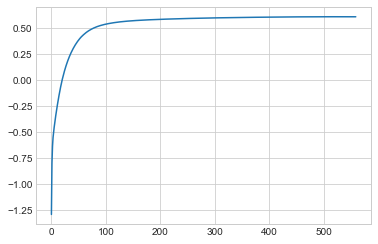

integral = 0.9959677705599095
renorm size 0.04569984686468782
sigma = 0.10986640514268109, lambda = 0.08478270380964249, mu = 0.001
Finished after 824 iterations
Integral tracker values : 824,138


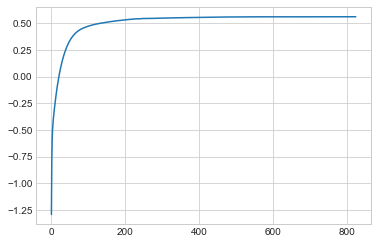

integral = 0.9987032343041945
renorm size 0.04488468864249894
sigma = 0.6842268733626355, lambda = 0.0038719435170410732, mu = 0.001
Finished after 304 iterations
Integral tracker values : 304,51


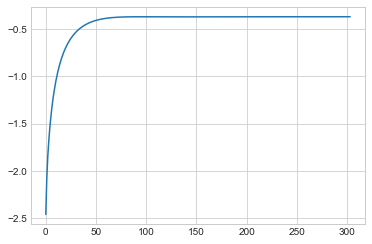

integral = 0.9960251302549686
renorm size 0.18931530575363065
sigma = 0.6842268733626355, lambda = 0.0038719435170410732, mu = 0.001
Finished after 201 iterations
Integral tracker values : 201,34


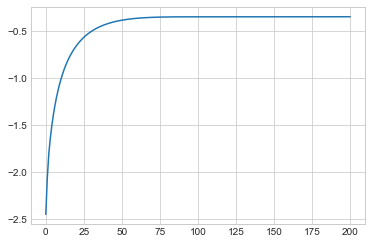

integral = 1.0076398438896952
renorm size 0.18915639057249709
sigma = 0.6842268733626355, lambda = 0.0038719435170410732, mu = 0.001
Finished after 201 iterations
Integral tracker values : 201,34


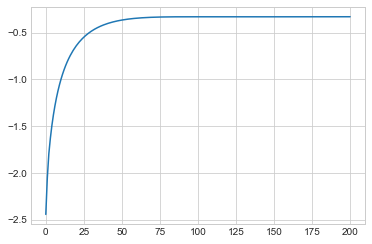

integral = 1.0080276773914185
renorm size 0.18938703621157743
sigma = 0.6842268733626355, lambda = 0.0038719435170410732, mu = 0.001
Finished after 202 iterations
Integral tracker values : 202,34


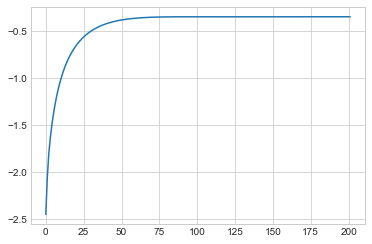

integral = 1.010245309754709
renorm size 0.1892480383168243
sigma = 0.6842268733626355, lambda = 0.0038719435170410732, mu = 0.001
Finished after 208 iterations
Integral tracker values : 208,35


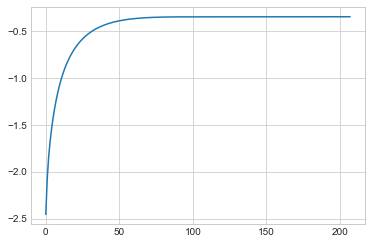

integral = 1.0091912096089182
renorm size 0.18731659437541798
sigma = 0.920937268372304, lambda = 0.013728423253374695, mu = 0.001
Finished after 358 iterations
Integral tracker values : 358,60


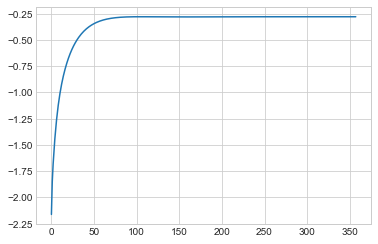

integral = 0.9916012654211077
renorm size 0.23393678598256032
sigma = 0.920937268372304, lambda = 0.013728423253374695, mu = 0.001
Finished after 358 iterations
Integral tracker values : 358,60


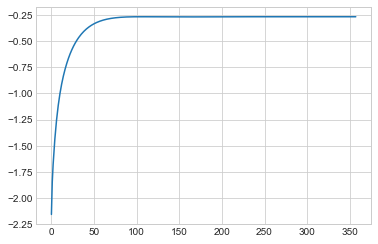

integral = 0.9931412543220952
renorm size 0.23386845827701655
sigma = 0.920937268372304, lambda = 0.013728423253374695, mu = 0.001
Finished after 358 iterations
Integral tracker values : 358,60


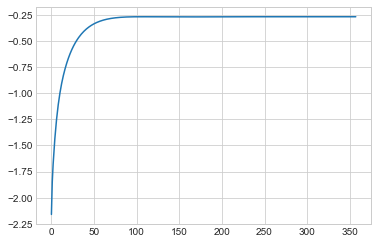

integral = 0.9935932453608173
renorm size 0.2341674538939393
sigma = 0.920937268372304, lambda = 0.013728423253374695, mu = 0.001
Finished after 358 iterations
Integral tracker values : 358,60


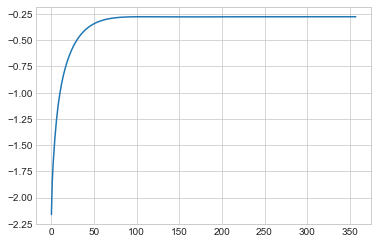

integral = 0.9925272013143366
renorm size 0.234176191483055
sigma = 0.920937268372304, lambda = 0.013728423253374695, mu = 0.001
Finished after 357 iterations
Integral tracker values : 357,60


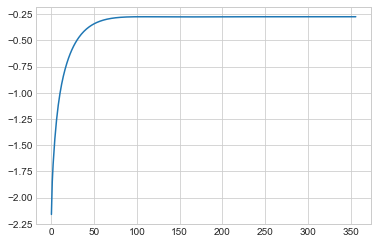

integral = 0.9935375316779255
renorm size 0.23359950354373332
sigma = 0.809539634569264, lambda = 0.11786812809182062, mu = 0.001
Finished after 381 iterations
Integral tracker values : 381,64


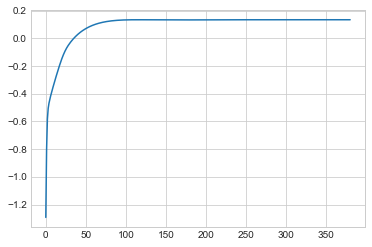

integral = 0.9937954766104459
renorm size 0.21319504250193794
sigma = 0.809539634569264, lambda = 0.11786812809182062, mu = 0.001
Finished after 263 iterations
Integral tracker values : 263,44


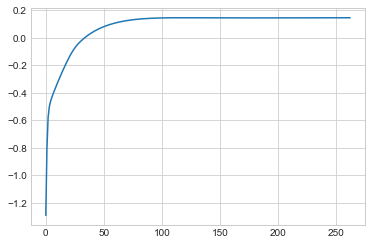

integral = 1.010007851477503
renorm size 0.21311588827298933
sigma = 0.809539634569264, lambda = 0.11786812809182062, mu = 0.001
Finished after 238 iterations
Integral tracker values : 238,40


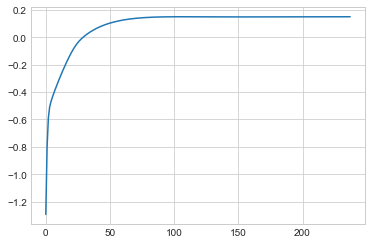

integral = 1.0093447083055662
renorm size 0.213425170548204
sigma = 0.809539634569264, lambda = 0.11786812809182062, mu = 0.001
Finished after 250 iterations
Integral tracker values : 250,42


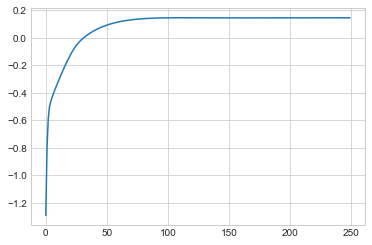

integral = 1.0101082807220583
renorm size 0.2133447811417323
sigma = 0.809539634569264, lambda = 0.11786812809182062, mu = 0.001
Finished after 262 iterations
Integral tracker values : 262,44


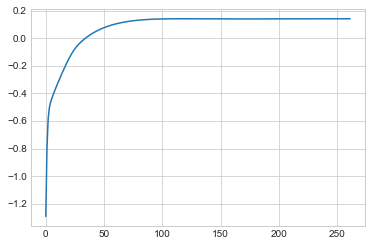

integral = 1.0097067207669843
renorm size 0.2125766631879972
sigma = 0.7647746524383906, lambda = 0.31378578223187, mu = 0.001
Finished after 437 iterations
Integral tracker values : 437,73


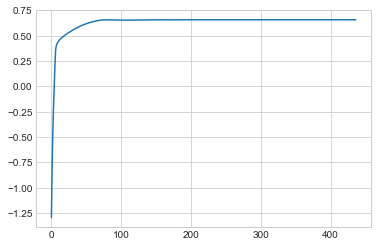

integral = 1.0053278929066884
renorm size 0.20495748622817223
sigma = 0.7647746524383906, lambda = 0.31378578223187, mu = 0.001
Finished after 416 iterations
Integral tracker values : 416,70


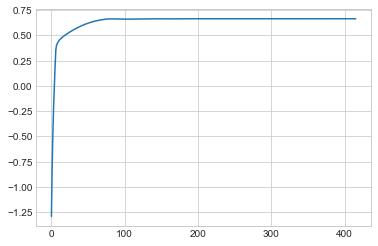

integral = 1.0036364364799062
renorm size 0.20478393719185567
sigma = 0.7647746524383906, lambda = 0.31378578223187, mu = 0.001
Finished after 427 iterations
Integral tracker values : 427,72


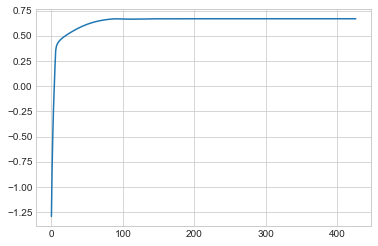

integral = 1.0062062181534441
renorm size 0.2049981292656012
sigma = 0.7647746524383906, lambda = 0.31378578223187, mu = 0.001
Finished after 425 iterations
Integral tracker values : 425,71


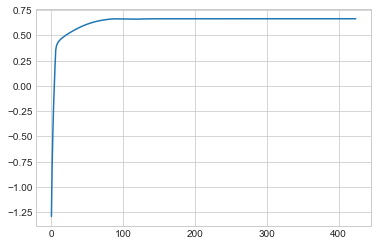

integral = 1.0054614065290655
renorm size 0.20485026746535434
sigma = 0.7647746524383906, lambda = 0.31378578223187, mu = 0.001
Finished after 439 iterations
Integral tracker values : 439,74


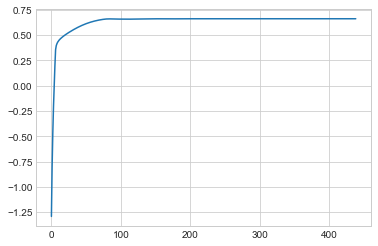

integral = 1.0059736598801086
renorm size 0.2037147579929225



In [50]:
r = utils_train.perform_study(model, X,fixed_params = fixed_params, variable_params = variable_params ,cv= cv, prune = prune,
                  n_trials = n_trials,save_path = save_path,version = None,eta = 0,n_jobs = 1)

In [51]:
version = None
df,best_params,aux = utils_train.get_results(save_path,model = model,version = version)
display(df)

number     value             datetime_start          datetime_complete  \
0       0  0.240039 2020-10-19 15:56:25.095941 2020-10-19 15:56:27.534414   
1       1  0.066041 2020-10-19 15:56:27.535887 2020-10-19 15:56:33.879301   
2       2  0.706579 2020-10-19 15:56:33.880634 2020-10-19 15:56:38.426725   
3       3  0.460458 2020-10-19 15:56:38.427917 2020-10-19 15:56:41.714391   
4       4  0.740499 2020-10-19 15:56:41.716027 2020-10-19 15:56:46.218458   
5       5 -0.013221 2020-10-19 15:56:46.219921 2020-10-19 15:56:52.894802   
6       6  0.469194 2020-10-19 15:56:52.896138 2020-10-19 15:56:55.718305   
7       7  0.748710 2020-10-19 15:56:55.719742 2020-10-19 15:57:00.087870   
8       8  0.781398 2020-10-19 15:57:00.089329 2020-10-19 15:57:03.488135   
9       9  0.943685 2020-10-19 15:57:03.489412 2020-10-19 15:57:08.365469   

         duration  params_la  params_sigma  user_attrs_accuracy  \
0 00:00:02.438473   0.001612      0.410304             0.240039   
1 00:00:06.343414   0.070383      0.102620             0.066041   
2 00:00:04.546091   0.062122      0.725411             0.706579   
3 00:00:03.286474   0.023567      0.598714             0.460458   
4 00:00:04.502431   0.027062      0.852752             0.740499   
5 00:00:06.674881   0.084783      0.109866            -0.013221   
6 00:00:02.822167   0.003872      0.684227             0.469194   
7 00:00:04.368128   0.013728      0.920937             0.748710   
8 00:00:03.398806   0.117868      0.809540             0.781398   
9 00:00:04.876057   0.313786      0.764775             0.943685   

                                   user_attrs_scores  user_attrs_std     state  
0  [0.4052657367233425, 0.18010381224537264, 0.07...        0.114677  COMPLETE  
1  [0.150531151530039, 0.014462356449808178, -0.4...        0.362798  COMPLETE  
2  [0.7407444257473671, 0.6818235322336075, 0.681...        0.022595  COMPLETE  
3  [0.5547875663346108, 0.42580816077951794, 0.38...        0.058576  COMPLETE  
4  [0.7672521715771586, 0.7140224863270901, 0.725...        0.018832  COMPLETE  
5  [0.19513148021471052, -0.0973303478517189, -0....        0.243218  COMPLETE  
6  [0.569114882198705, 0.435055042550279, 0.38973...        0.061052  COMPLETE  
7  [0.7730860434374015, 0.7209636819066475, 0.736...        0.018197  COMPLETE  
8  [0.8254102095063219, 0.76273748012698, 0.75658...        0.024785  COMPLETE  
9  [0.9498633022857691, 0.9283024345869101, 0.948...        0.008763  COMPLETE

In [54]:
eta = 0
params = aux(0)
print(params)

{'sigma': 0.10986640514268109, 'la': 0.08478270380964249, 'Niter': 'auto', 'mu_base': tensor([0.]), 'eta_base': 5, 'mu': 0.001}


In [53]:
params['la'] = 0.5
params['mu'] = 0.01

sigma = 0.10986640514268109, lambda = 0.08478270380964249, mu = 0.001
Finished after 530 iterations
Integral tracker values : 530,142


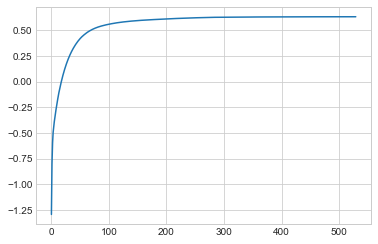

In [55]:
clf = model(**params)
clf.fit(X)

integral = 1.0020645233237213
renorm size 0.04630960699757377
tensor(1.0021)
integral = 1.0020645233237213
renorm size 0.04630960699757377


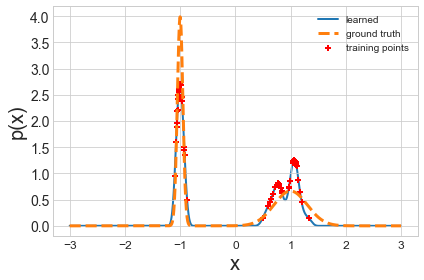

In [56]:
c,r,ntest = 0,3,100000
xtest = torch.linspace(c-r,c+r,ntest)

ytest = clf.predict(xtest)
print(ytest.sum()*2*r/ntest)
ydata_set =clf.predict(data_set)
ytestref = density_fun(xtest)

fig = plt.figure()
plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
plt.scatter(data_set,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=1000)
plt.show()

In [6]:
version = find_last_version(path = 'models/our_model_1D',extension = 'pickle')

print(f'last version number : {version}')

last version number : 1


sigma = 1, lambda = 0.0001, mu = 1e-06
Finished after 8422 iterations
Integral tracker values : 8422,1404


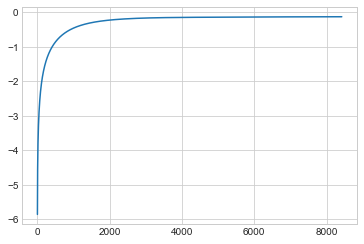

integral = 1.0057310227075624
sigma = 1, lambda = 0.0001, mu = 1e-06
Finished after 9745 iterations
Integral tracker values : 9745,1873


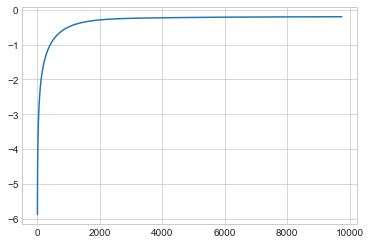

integral = 0.9984456085458848
sigma = 1, lambda = 0.0001, mu = 1e-06
Finished after 8145 iterations
Integral tracker values : 8145,1358


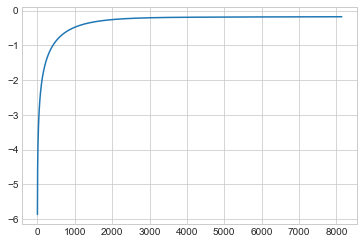

integral = 1.0031410257247109
sigma = 1, lambda = 0.0001, mu = 1e-06
Finished after 6091 iterations
Integral tracker values : 6091,1016


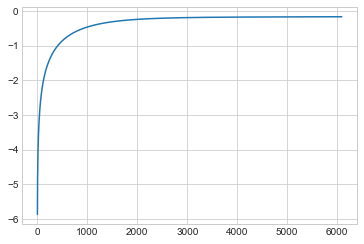

integral = 0.9940129735894877
sigma = 1, lambda = 0.0001, mu = 1e-06
Finished after 6080 iterations
Integral tracker values : 6080,1094


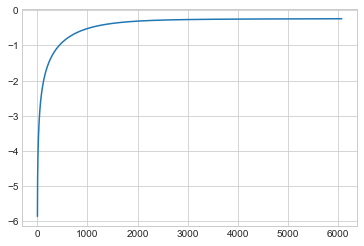

integral = 0.9992157975495173
sigma = 1, lambda = 0.0001, mu = 2.1544346900318823e-05
Finished after 1970 iterations
Integral tracker values : 1970,1298


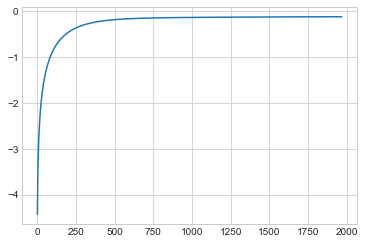

integral = 1.005519077230588
sigma = 1, lambda = 0.0001, mu = 2.1544346900318823e-05
Integral tracker values : 2253,620


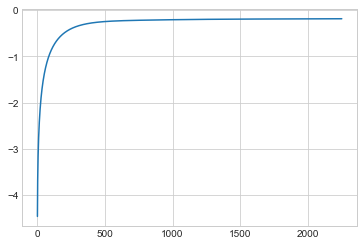

integral = 0.9943351278535184
sigma = 1, lambda = 0.0001, mu = 2.1544346900318823e-05
Finished after 1580 iterations
Integral tracker values : 1580,636


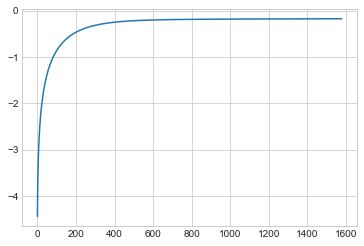

integral = 0.9973681745307139
sigma = 1, lambda = 0.0001, mu = 2.1544346900318823e-05
Finished after 1810 iterations
Integral tracker values : 1810,749


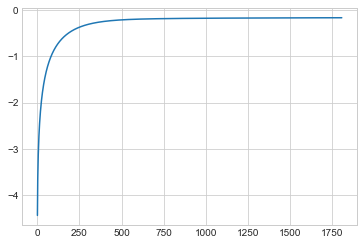

integral = 0.9988669894040998
sigma = 1, lambda = 0.0001, mu = 2.1544346900318823e-05
Finished after 1277 iterations
Integral tracker values : 1277,213


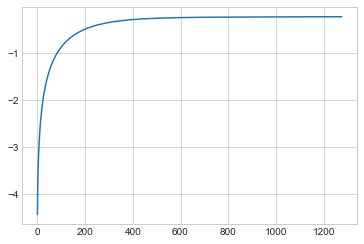

integral = 0.9989256081283993
sigma = 1, lambda = 0.0001, mu = 0.00046415888336127773
Finished after 495 iterations
Integral tracker values : 495,262


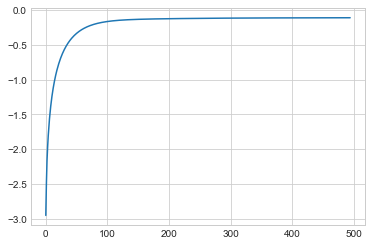

integral = 1.004808344678149
sigma = 1, lambda = 0.0001, mu = 0.00046415888336127773
Integral tracker values : 563,213


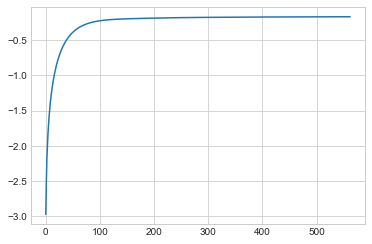

integral = 1.0011869097150696
sigma = 1, lambda = 0.0001, mu = 0.00046415888336127773
Finished after 370 iterations
Integral tracker values : 370,132


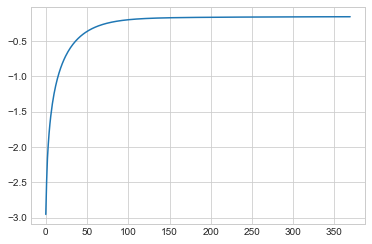

integral = 1.001501567372625
sigma = 1, lambda = 0.0001, mu = 0.00046415888336127773
Finished after 465 iterations
Integral tracker values : 465,222


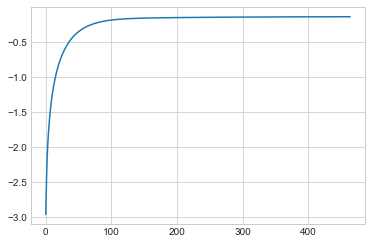

integral = 1.0004780209237292
sigma = 1, lambda = 0.0001, mu = 0.00046415888336127773
Finished after 310 iterations
Integral tracker values : 310,64


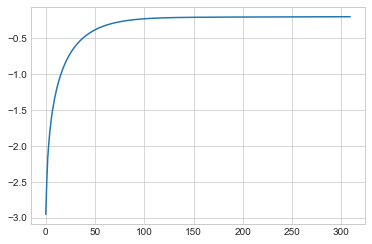

integral = 1.0041531002266746
sigma = 1, lambda = 0.0001, mu = 0.01
Finished after 75 iterations
Integral tracker values : 75,27


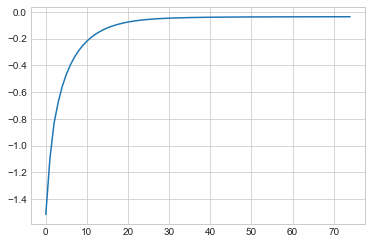

integral = 0.9995839537995799
sigma = 1, lambda = 0.0001, mu = 0.01
Finished after 80 iterations
Integral tracker values : 80,29


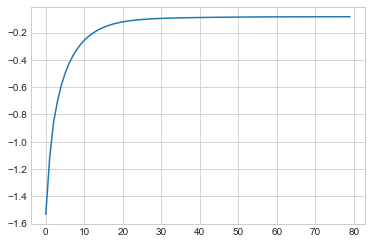

integral = 1.0030962346731551
sigma = 1, lambda = 0.0001, mu = 0.01
Finished after 75 iterations
Integral tracker values : 75,24


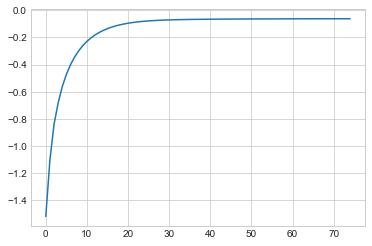

integral = 1.0014961167055279
sigma = 1, lambda = 0.0001, mu = 0.01
Finished after 70 iterations
Integral tracker values : 70,20


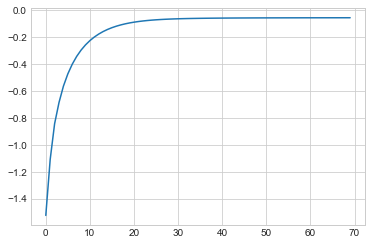

integral = 1.0006344574552066
sigma = 1, lambda = 0.0001, mu = 0.01
Finished after 80 iterations
Integral tracker values : 80,24


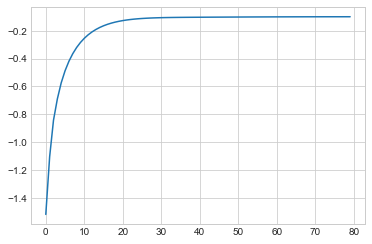

integral = 1.004769255179105
sigma = 1, lambda = 0.002154434690031882, mu = 1e-06
Finished after 7400 iterations
Integral tracker values : 7400,1779


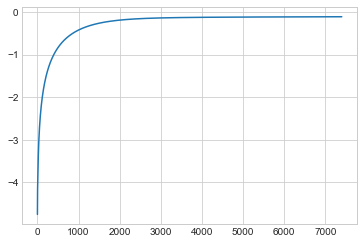

integral = 0.9994167527078441
sigma = 1, lambda = 0.002154434690031882, mu = 1e-06
Integral tracker values : 10099,1548


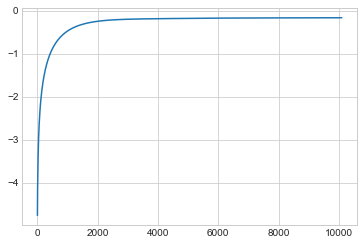

integral = 0.998303955235605
sigma = 1, lambda = 0.002154434690031882, mu = 1e-06
Finished after 6925 iterations
Integral tracker values : 6925,1155


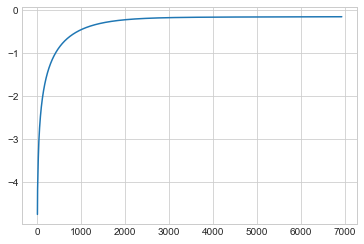

integral = 0.9997217441485116
sigma = 1, lambda = 0.002154434690031882, mu = 1e-06
Finished after 7042 iterations
Integral tracker values : 7042,1174


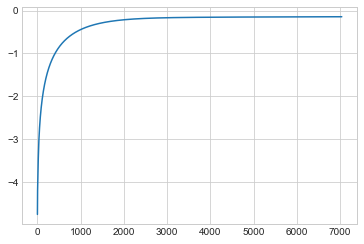

integral = 1.0032455468638846
sigma = 1, lambda = 0.002154434690031882, mu = 1e-06
Finished after 7097 iterations
Integral tracker values : 7097,1183


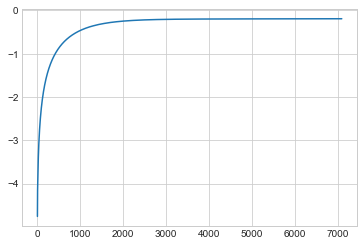

integral = 1.0027328052201394
sigma = 1, lambda = 0.002154434690031882, mu = 2.1544346900318823e-05
Finished after 1910 iterations
Integral tracker values : 1910,674


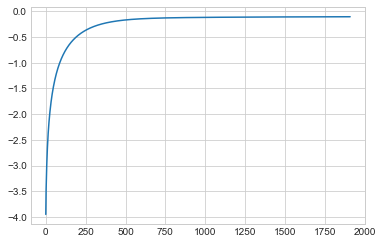

integral = 1.0012056609244997
sigma = 1, lambda = 0.002154434690031882, mu = 2.1544346900318823e-05
Integral tracker values : 2253,343


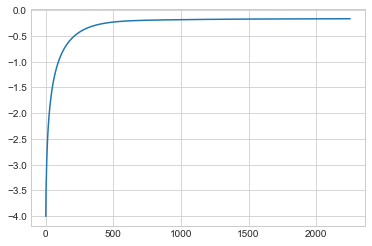

integral = 0.9995475504060325
sigma = 1, lambda = 0.002154434690031882, mu = 2.1544346900318823e-05
Finished after 1565 iterations
Integral tracker values : 1565,263


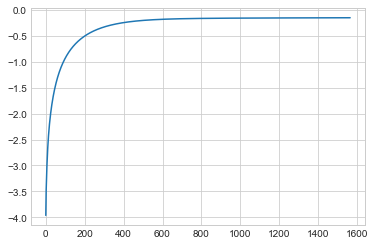

integral = 0.9997720675691706
sigma = 1, lambda = 0.002154434690031882, mu = 2.1544346900318823e-05
Finished after 1900 iterations
Integral tracker values : 1900,575


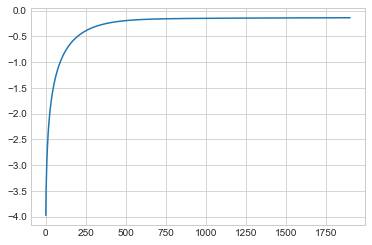

integral = 1.0039823825466767
sigma = 1, lambda = 0.002154434690031882, mu = 2.1544346900318823e-05
Finished after 1574 iterations
Integral tracker values : 1574,263


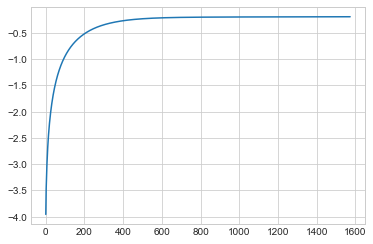

integral = 1.0013028586377652
sigma = 1, lambda = 0.002154434690031882, mu = 0.00046415888336127773
Finished after 495 iterations
Integral tracker values : 495,245


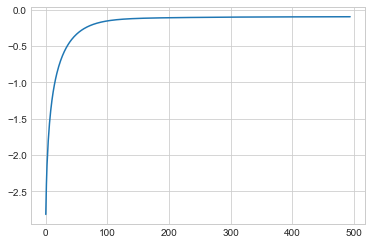

integral = 1.003807019569267
sigma = 1, lambda = 0.002154434690031882, mu = 0.00046415888336127773
Integral tracker values : 563,195


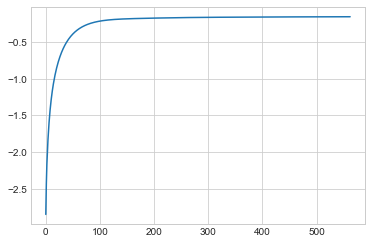

integral = 0.9983148178337925
sigma = 1, lambda = 0.002154434690031882, mu = 0.00046415888336127773
Finished after 385 iterations
Integral tracker values : 385,131


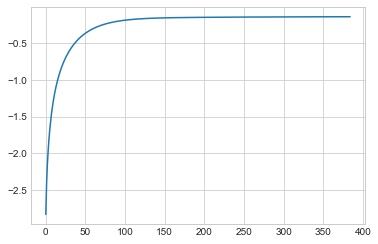

integral = 1.0018208010024834
sigma = 1, lambda = 0.002154434690031882, mu = 0.00046415888336127773
Finished after 475 iterations
Integral tracker values : 475,216


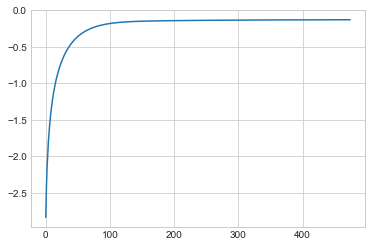

integral = 0.9993476293131784
sigma = 1, lambda = 0.002154434690031882, mu = 0.00046415888336127773
Finished after 315 iterations
Integral tracker values : 315,54


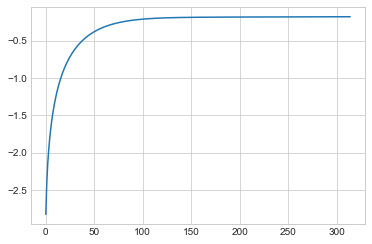

integral = 1.0033143691278439
sigma = 1, lambda = 0.002154434690031882, mu = 0.01
Finished after 70 iterations
Integral tracker values : 70,22


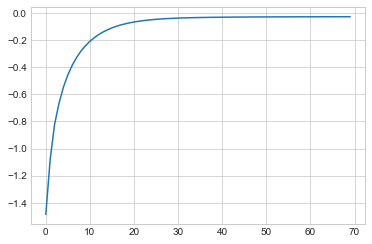

integral = 0.9998474545768197
sigma = 1, lambda = 0.002154434690031882, mu = 0.01
Finished after 75 iterations
Integral tracker values : 75,27


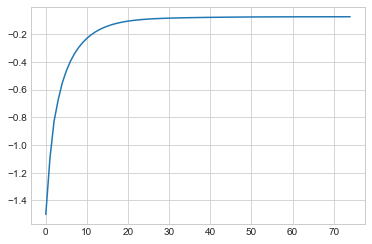

integral = 1.0033193136740146
sigma = 1, lambda = 0.002154434690031882, mu = 0.01
Finished after 75 iterations
Integral tracker values : 75,24


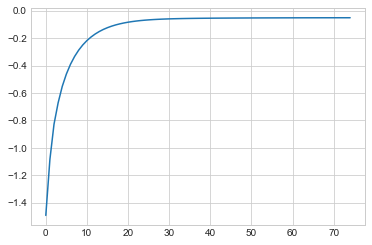

integral = 1.0013784269126882
sigma = 1, lambda = 0.002154434690031882, mu = 0.01
Finished after 65 iterations
Integral tracker values : 65,15


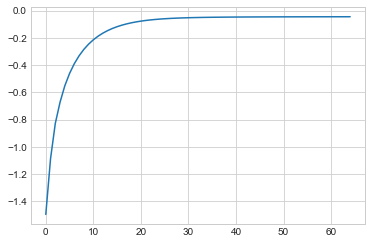

integral = 0.9998545071497901
sigma = 1, lambda = 0.002154434690031882, mu = 0.01
Finished after 80 iterations
Integral tracker values : 80,24


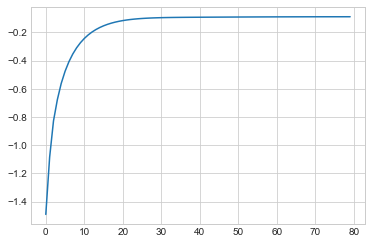

integral = 1.004757361236102
sigma = 1, lambda = 0.046415888336127774, mu = 1e-06
Integral tracker values : 10099,0


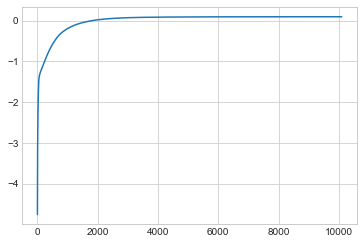

integral = 0.9690031186054491
sigma = 1, lambda = 0.046415888336127774, mu = 1e-06
Integral tracker values : 10099,0


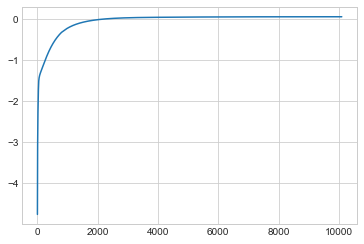

integral = 0.9728086685622033
sigma = 1, lambda = 0.046415888336127774, mu = 1e-06
Finished after 7222 iterations
Integral tracker values : 7222,1204


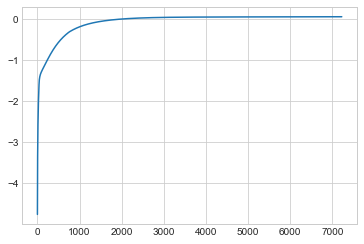

integral = 1.0009815656501952
sigma = 1, lambda = 0.046415888336127774, mu = 1e-06
Integral tracker values : 10099,0


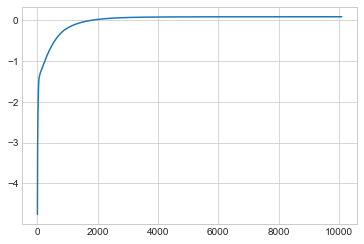

integral = 0.9719021927937108
sigma = 1, lambda = 0.046415888336127774, mu = 1e-06
Finished after 7462 iterations
Integral tracker values : 7462,1244


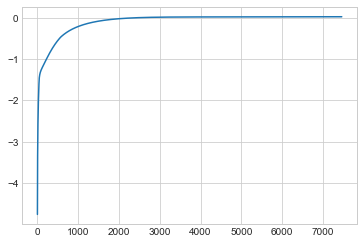

integral = 1.0044177628764546
sigma = 1, lambda = 0.046415888336127774, mu = 2.1544346900318823e-05
Integral tracker values : 2253,0


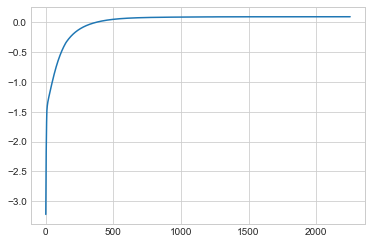

integral = 0.9822618787036995
sigma = 1, lambda = 0.046415888336127774, mu = 2.1544346900318823e-05
Integral tracker values : 2253,0


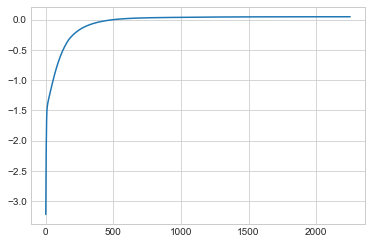

integral = 1.0813266961228896
sigma = 1, lambda = 0.046415888336127774, mu = 2.1544346900318823e-05
Finished after 1690 iterations
Integral tracker values : 1690,396


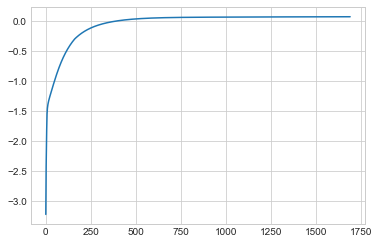

integral = 1.0032512129699365
sigma = 1, lambda = 0.046415888336127774, mu = 2.1544346900318823e-05
Integral tracker values : 2253,160


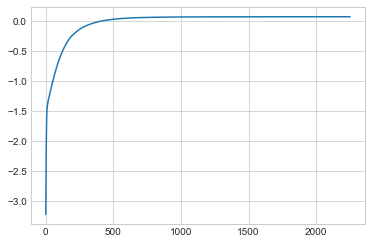

integral = 1.0025583405008875
sigma = 1, lambda = 0.046415888336127774, mu = 2.1544346900318823e-05
Finished after 1605 iterations
Integral tracker values : 1605,268


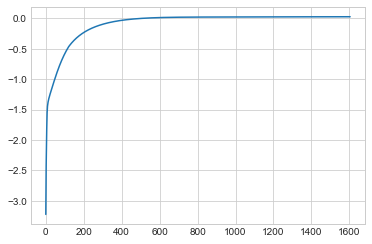

integral = 1.0043329134057344
sigma = 1, lambda = 0.046415888336127774, mu = 0.00046415888336127773
Finished after 507 iterations
Integral tracker values : 507,85


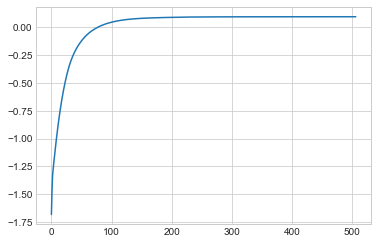

integral = 1.0057560396867493
sigma = 1, lambda = 0.046415888336127774, mu = 0.00046415888336127773
Finished after 553 iterations
Integral tracker values : 553,93


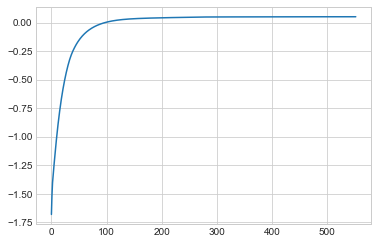

integral = 0.9995089524298693
sigma = 1, lambda = 0.046415888336127774, mu = 0.00046415888336127773
Finished after 533 iterations
Integral tracker values : 533,89


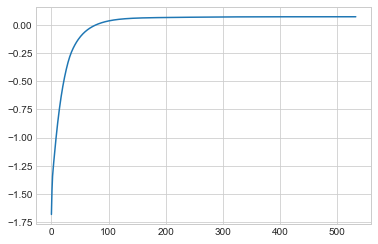

integral = 1.0035316441352455
sigma = 1, lambda = 0.046415888336127774, mu = 0.00046415888336127773
Finished after 437 iterations
Integral tracker values : 437,73


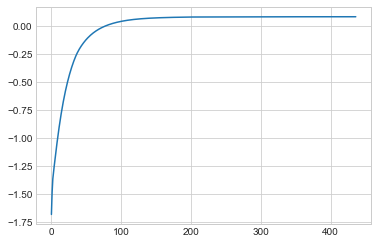

integral = 1.0016280342973185
sigma = 1, lambda = 0.046415888336127774, mu = 0.00046415888336127773
Finished after 360 iterations
Integral tracker values : 360,87


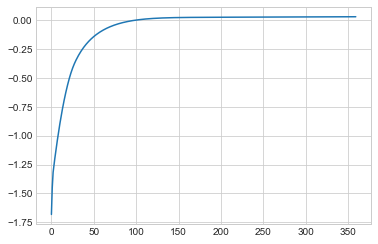

integral = 1.0066006397619516
sigma = 1, lambda = 0.046415888336127774, mu = 0.01
Finished after 64 iterations
Integral tracker values : 64,11


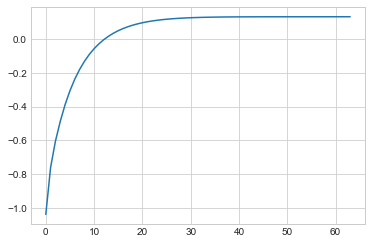

integral = 0.9945778743861466
sigma = 1, lambda = 0.046415888336127774, mu = 0.01
Finished after 70 iterations
Integral tracker values : 70,13


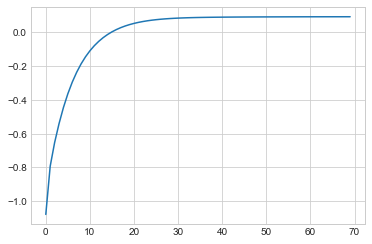

integral = 0.9992217805761241
sigma = 1, lambda = 0.046415888336127774, mu = 0.01
Finished after 65 iterations
Integral tracker values : 65,11


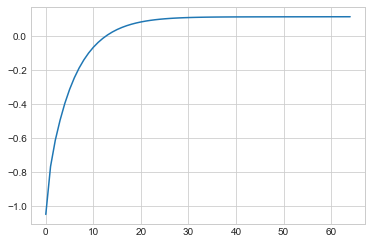

integral = 0.9970718884469196
sigma = 1, lambda = 0.046415888336127774, mu = 0.01
Finished after 74 iterations
Integral tracker values : 74,13


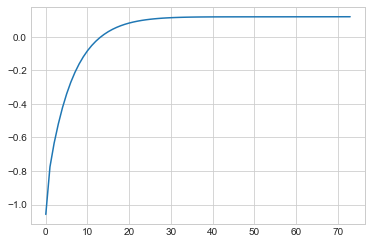

integral = 0.9978798742287823
sigma = 1, lambda = 0.046415888336127774, mu = 0.01
Finished after 70 iterations
Integral tracker values : 70,13


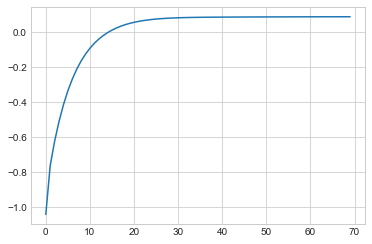

integral = 1.0022822493790249
sigma = 1, lambda = 1.0, mu = 1e-06
Finished after 3869 iterations
Integral tracker values : 3869,645


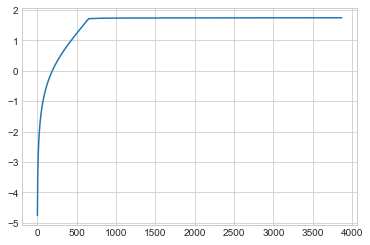

integral = 0.994451103304623
sigma = 1, lambda = 1.0, mu = 1e-06
Finished after 2672 iterations
Integral tracker values : 2672,446


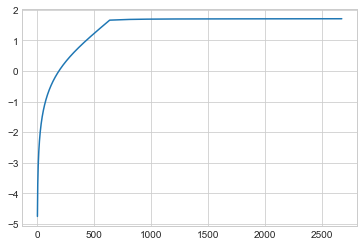

integral = 0.9923818691793432
sigma = 1, lambda = 1.0, mu = 1e-06
Finished after 4003 iterations
Integral tracker values : 4003,668


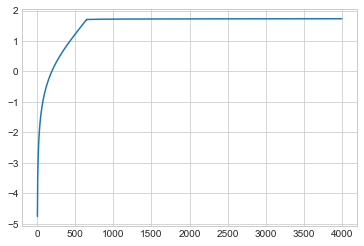

integral = 0.9966937507258
sigma = 1, lambda = 1.0, mu = 1e-06
Finished after 3819 iterations
Integral tracker values : 3819,637


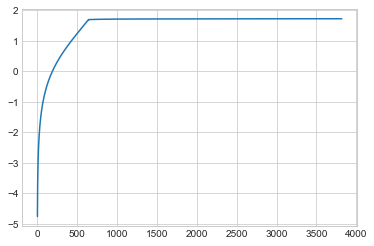

integral = 0.9948345475716958
sigma = 1, lambda = 1.0, mu = 1e-06
Finished after 3743 iterations
Integral tracker values : 3743,624


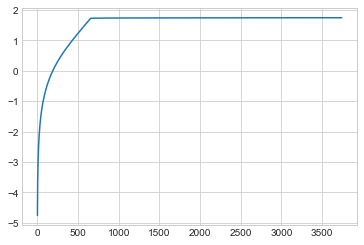

integral = 0.9949723421413111
sigma = 1, lambda = 1.0, mu = 2.1544346900318823e-05
Finished after 782 iterations
Integral tracker values : 782,131


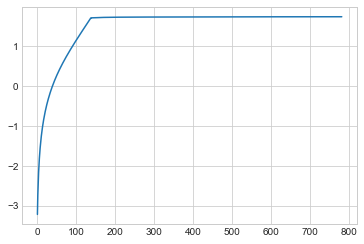

integral = 0.9934443259040173
sigma = 1, lambda = 1.0, mu = 2.1544346900318823e-05
Finished after 549 iterations
Integral tracker values : 549,92


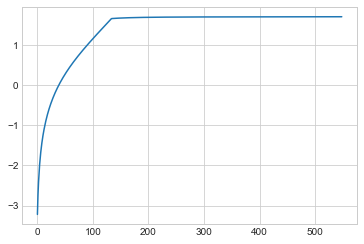

integral = 0.9929621351389566
sigma = 1, lambda = 1.0, mu = 2.1544346900318823e-05
Finished after 838 iterations
Integral tracker values : 838,140


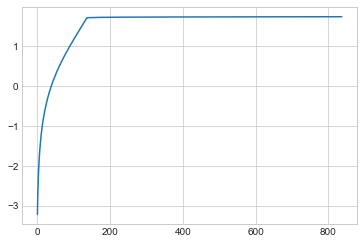

integral = 0.9963359322524452
sigma = 1, lambda = 1.0, mu = 2.1544346900318823e-05
Finished after 787 iterations
Integral tracker values : 787,132


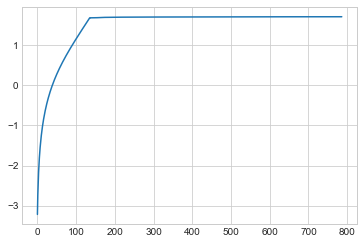

integral = 0.9943200113728612
sigma = 1, lambda = 1.0, mu = 2.1544346900318823e-05
Finished after 770 iterations
Integral tracker values : 770,129


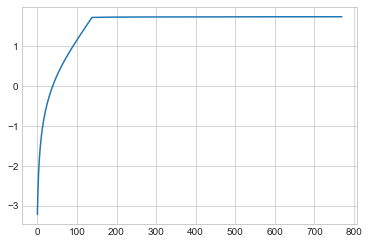

integral = 0.9943849670426369
sigma = 1, lambda = 1.0, mu = 0.00046415888336127773
Finished after 94 iterations
Integral tracker values : 94,16


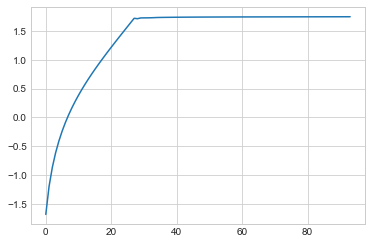

integral = 0.9913532093715011
sigma = 1, lambda = 1.0, mu = 0.00046415888336127773
Finished after 99 iterations
Integral tracker values : 99,17


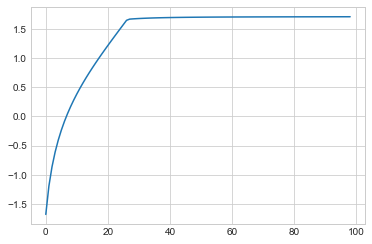

integral = 0.9950776145916472
sigma = 1, lambda = 1.0, mu = 0.00046415888336127773
Finished after 153 iterations
Integral tracker values : 153,26


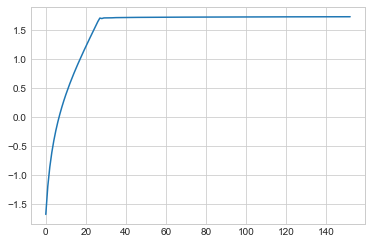

integral = 0.9948995355147863
sigma = 1, lambda = 1.0, mu = 0.00046415888336127773
Finished after 128 iterations
Integral tracker values : 128,22


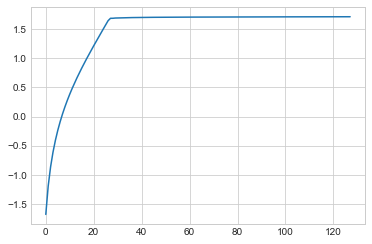

integral = 0.9931553967086033
sigma = 1, lambda = 1.0, mu = 0.00046415888336127773
Finished after 50 iterations
Integral tracker values : 50,20


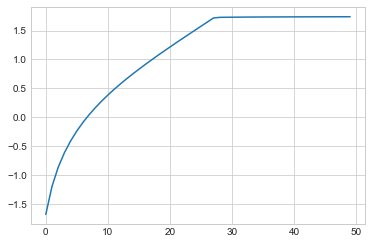

integral = 0.9914435775138171
sigma = 1, lambda = 1.0, mu = 0.01
Finished after 55 iterations
Integral tracker values : 55,19


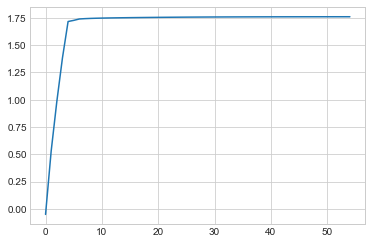

integral = 1.0010070624161196
sigma = 1, lambda = 1.0, mu = 0.01
Finished after 65 iterations
Integral tracker values : 65,29


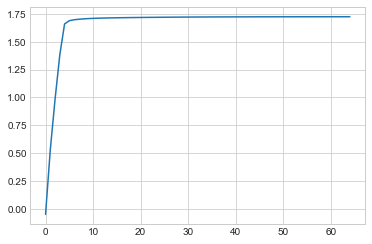

integral = 0.9980229244090697
sigma = 1, lambda = 1.0, mu = 0.01
Finished after 60 iterations
Integral tracker values : 60,25


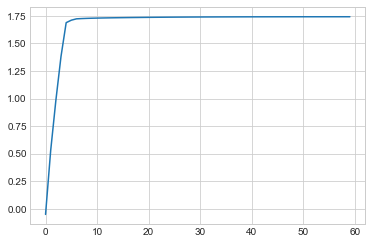

integral = 0.9993811149913454
sigma = 1, lambda = 1.0, mu = 0.01
Finished after 55 iterations
Integral tracker values : 55,19


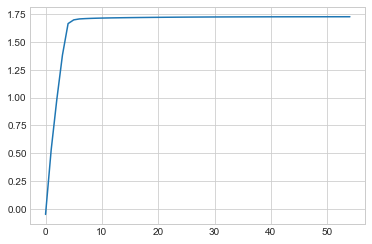

integral = 1.0007719094815466
sigma = 1, lambda = 1.0, mu = 0.01
Finished after 50 iterations
Integral tracker values : 50,16


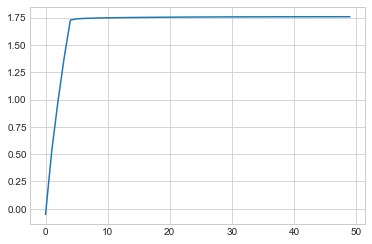

integral = 1.0011565377749119
sigma = 1, lambda = 0.002154434690031882, mu = 0.00046415888336127773
Finished after 440 iterations
Integral tracker values : 440,185


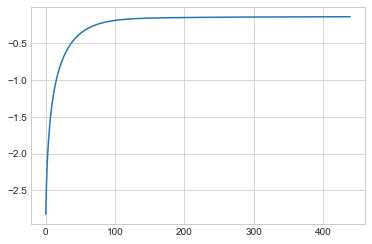

In [18]:
parameters = {'sigma' : [1], 'la' : np.logspace(-4,0,4),'mu' : np.logspace(-6,-2,4), 'Niter' : ['auto'],'mu_base' : [mu_base],'eta_base' : [eta_base]}
X = data_set
model = utils.QuadraticEstimator()
clf = GridSearchCV(model, parameters,cv = 5)
clf.fit(X)
clf_info = {'cross_valid' : clf.cv_results_,'data_set' : data_set}
version = 1
filename = f'models/our_model_1D_{version}.pickle'
pickle.dump(clf_info, open(filename, 'wb'))

In [4]:
model = utils.QuadraticEstimator

In [6]:
model.__name__

'QuadraticEstimator'

In [15]:
fixed_params = {
        'sigma' : 1, 
            'Niter' : 'auto',
            'mu_base' : mu_base,
            'eta_base' : eta_base
           }
variable_params = {
    'la' : ['loguniform',1e-4,1e0],
    'mu' : ['loguniform',1e-4,1e-2]
}

X = data_set 
model = utils.QuadraticEstimator

#version = last_version + 1
version = 1

cv = 5
prune = True
n_trials =  3
save_path = f'models/density_estimation_1d_{model.__name__}_v{version}.pickle'

n_jobs = 1
eta = 1


    
    
    
            
        



In [18]:
study = perform_study(model,X, fixed_params = fixed_params, variable_params = variable_params,cv= cv, prune = prune, n_trials = n_trials,save_path = save_path,eta = eta,n_jobs = n_jobs)

NameError: name 'perform_study' is not defined

In [17]:
d = study.trials_dataframe()

[autoreload of npm_nnf.utils.utils_train failed: Traceback (most recent call last):
  File "/opt/miniconda3/envs/p36/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/miniconda3/envs/p36/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/opt/miniconda3/envs/p36/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/opt/miniconda3/envs/p36/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/

NameError: name 'study' is not defined

sigma = 1, lambda = 0.5793308883818876, mu = 4.195445738362254e-06
Finished after 2782 iterations
Integral tracker values : 2782,464


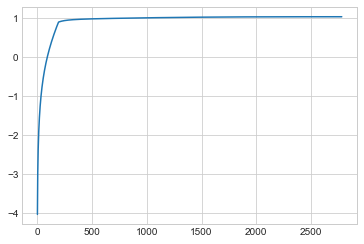

integral = 0.99533410841035
sigma = 1, lambda = 0.5793308883818876, mu = 4.195445738362254e-06
Finished after 2728 iterations
Integral tracker values : 2728,455


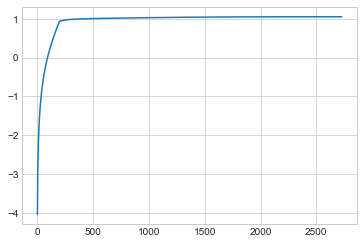

integral = 0.993970376647699
sigma = 1, lambda = 0.5793308883818876, mu = 4.195445738362254e-06
Finished after 2773 iterations
Integral tracker values : 2773,463


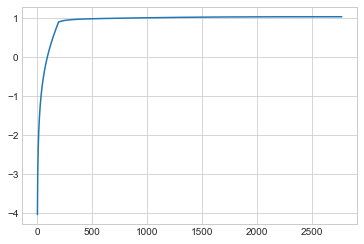

integral = 0.9948804221128698
sigma = 1, lambda = 0.5793308883818876, mu = 4.195445738362254e-06
Finished after 2799 iterations
Integral tracker values : 2799,467


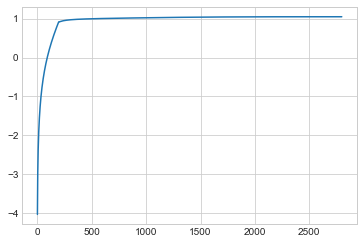

integral = 0.992927946165266
sigma = 1, lambda = 0.5793308883818876, mu = 4.195445738362254e-06
Finished after 2752 iterations
Integral tracker values : 2752,459


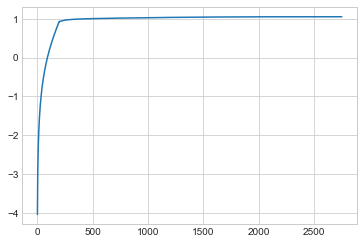

integral = 0.9932164256040266
sigma = 1, lambda = 0.5793308883818876, mu = 4.195445738362254e-06
Finished after 2602 iterations
Integral tracker values : 2602,434


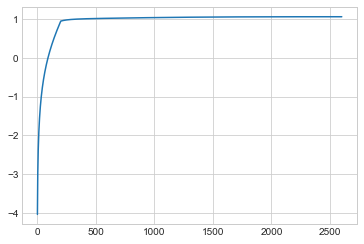

integral = 0.9941787393787768
sigma = 1, lambda = 0.5793308883818876, mu = 4.195445738362254e-06
Finished after 2777 iterations
Integral tracker values : 2777,463


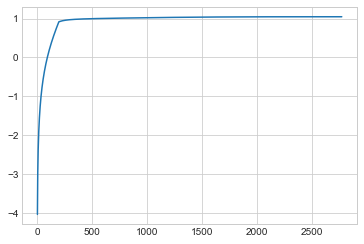

integral = 0.993288172325988
[1.44145541 1.33135111 1.44357025 1.33624862 1.33475595 1.30426736
 1.35317398]
sigma = 1, lambda = 0.019489439233934522, mu = 5.539194696852e-06
Finished after 3399 iterations
Integral tracker values : 3399,567


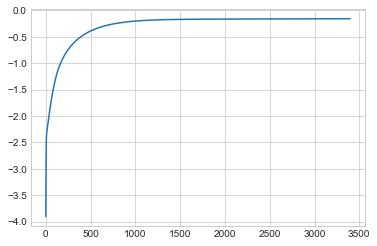

integral = 1.0058050058074677
sigma = 1, lambda = 0.019489439233934522, mu = 5.539194696852e-06
Finished after 3203 iterations
Integral tracker values : 3203,534


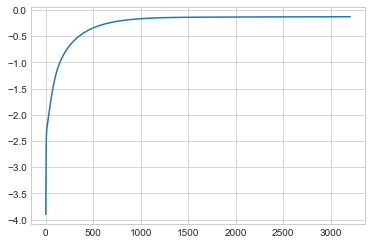

integral = 1.0057301108316408
sigma = 1, lambda = 0.019489439233934522, mu = 5.539194696852e-06
Finished after 3445 iterations
Integral tracker values : 3445,604


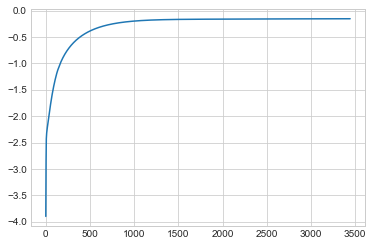

integral = 1.0056083904384971
sigma = 1, lambda = 0.019489439233934522, mu = 5.539194696852e-06
Finished after 3439 iterations
Integral tracker values : 3439,574


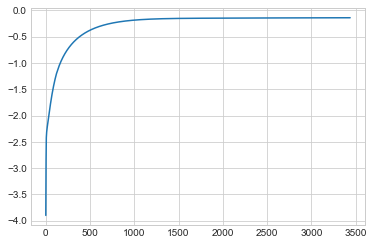

integral = 1.0065607353793131
sigma = 1, lambda = 0.019489439233934522, mu = 5.539194696852e-06
Finished after 3230 iterations
Integral tracker values : 3230,539


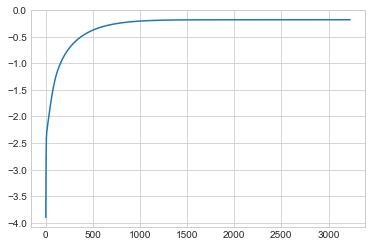

integral = 1.0051662753142943
sigma = 1, lambda = 0.019489439233934522, mu = 5.539194696852e-06
Finished after 3230 iterations
Integral tracker values : 3230,539


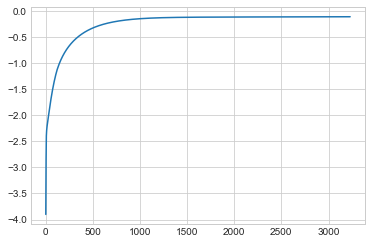

integral = 1.005013999368304
sigma = 1, lambda = 0.019489439233934522, mu = 5.539194696852e-06
Finished after 3635 iterations
Integral tracker values : 3635,746


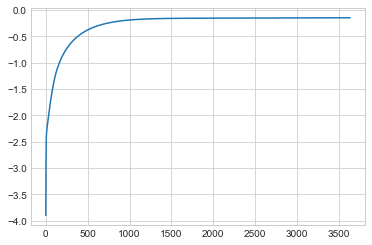

integral = 1.0076343143380728
[1.04202016 0.89077152 1.01760259 0.93450174 1.21849813 0.78849341
 0.97756322]
sigma = 1, lambda = 0.024507247224811672, mu = 0.0002134438413017661
Integral tracker values : 783,349


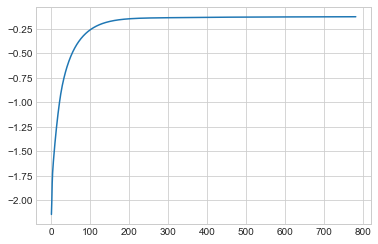

integral = 0.9971211005436755
sigma = 1, lambda = 0.024507247224811672, mu = 0.0002134438413017661
Finished after 765 iterations
Integral tracker values : 765,335


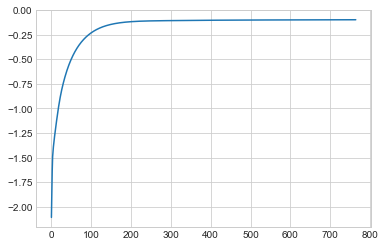

integral = 0.9968704630680694
sigma = 1, lambda = 0.024507247224811672, mu = 0.0002134438413017661
Integral tracker values : 783,347


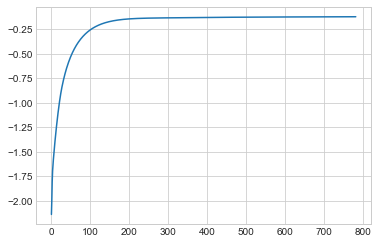

integral = 0.998340772863693
sigma = 1, lambda = 0.024507247224811672, mu = 0.0002134438413017661
Integral tracker values : 783,344


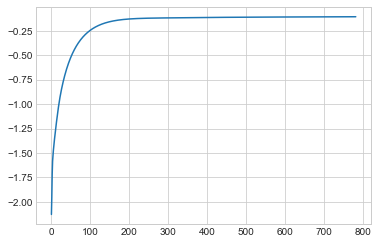

integral = 0.9967287868595505
sigma = 1, lambda = 0.024507247224811672, mu = 0.0002134438413017661
Finished after 520 iterations
Integral tracker values : 520,87


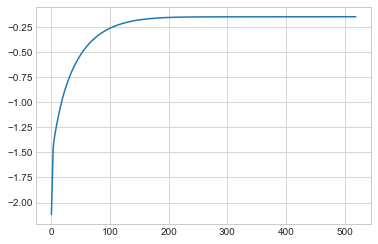

integral = 1.0049131126970963
sigma = 1, lambda = 0.024507247224811672, mu = 0.0002134438413017661
Integral tracker values : 783,370


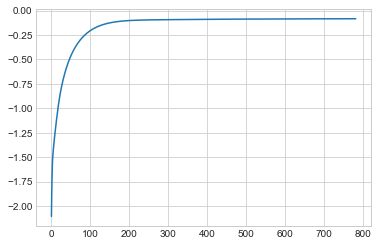

integral = 0.9980463489484377
sigma = 1, lambda = 0.024507247224811672, mu = 0.0002134438413017661
Integral tracker values : 783,340


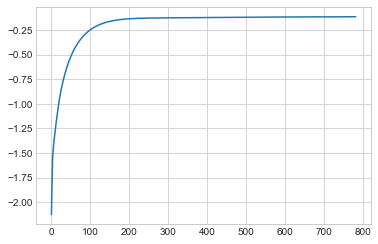

integral = 0.9985836352938401
[1.05287524 0.90938114 1.02358987 0.94768603 1.22975282 0.80149261
 0.99136373]
sigma = 1, lambda = 0.11883042579131936, mu = 2.4152848858919328e-05
Integral tracker values : 2133,127


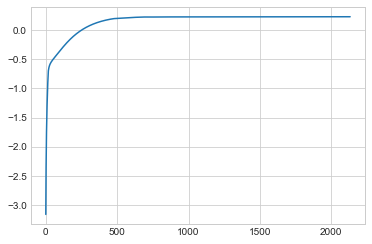

integral = 1.0066381658332608
sigma = 1, lambda = 0.11883042579131936, mu = 2.4152848858919328e-05
Integral tracker values : 2133,187


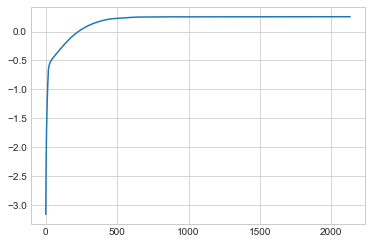

integral = 1.0062876197694612
[1.20976686 1.07345556]
sigma = 1, lambda = 0.018403883384064876, mu = 7.895653844317188e-06
Finished after 2843 iterations
Integral tracker values : 2843,474


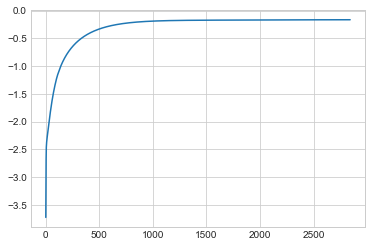

integral = 1.0056702681420544
sigma = 1, lambda = 0.018403883384064876, mu = 7.895653844317188e-06
Finished after 2681 iterations
Integral tracker values : 2681,447


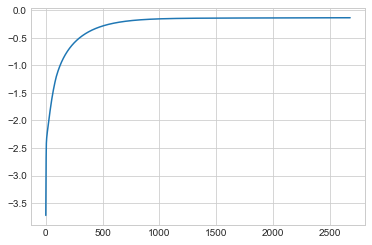

integral = 1.0057393772903518
sigma = 1, lambda = 0.018403883384064876, mu = 7.895653844317188e-06
Finished after 2995 iterations
Integral tracker values : 2995,615


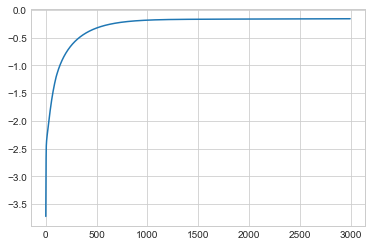

integral = 1.0072153050991468
sigma = 1, lambda = 0.018403883384064876, mu = 7.895653844317188e-06
Finished after 2965 iterations
Integral tracker values : 2965,569


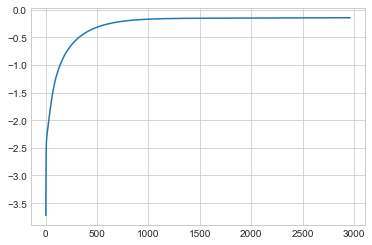

integral = 1.0077717882581512
sigma = 1, lambda = 0.018403883384064876, mu = 7.895653844317188e-06
Finished after 2835 iterations
Integral tracker values : 2835,473


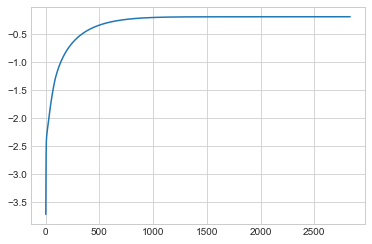

integral = 1.0051675148154198
sigma = 1, lambda = 0.018403883384064876, mu = 7.895653844317188e-06
Finished after 2703 iterations
Integral tracker values : 2703,451


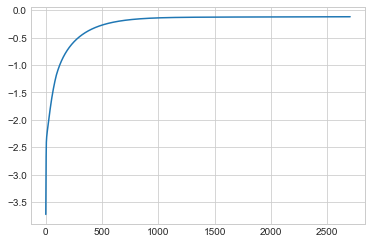

integral = 1.005012429339013
sigma = 1, lambda = 0.018403883384064876, mu = 7.895653844317188e-06
Finished after 3195 iterations
Integral tracker values : 3195,777


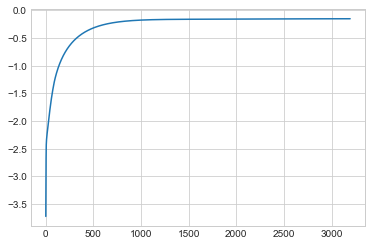

integral = 1.008374251222126
[1.04235042 0.88997562 1.01519807 0.93084229 1.21644744 0.78728702
 0.97404512]
sigma = 1, lambda = 0.022912722773984193, mu = 0.00024362253723096065
Finished after 590 iterations
Integral tracker values : 590,239


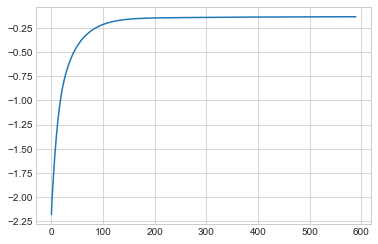

integral = 0.9992071937134993
sigma = 1, lambda = 0.022912722773984193, mu = 0.00024362253723096065
Finished after 485 iterations
Integral tracker values : 485,153


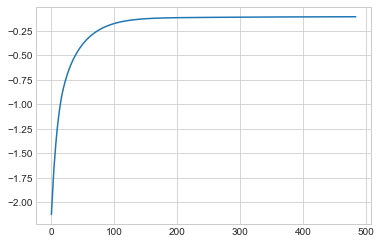

integral = 1.0052804204282406
sigma = 1, lambda = 0.022912722773984193, mu = 0.00024362253723096065
Finished after 690 iterations
Integral tracker values : 690,353


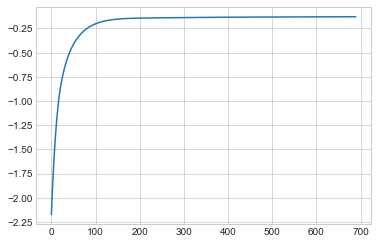

integral = 0.9985673271688544
sigma = 1, lambda = 0.022912722773984193, mu = 0.00024362253723096065
Integral tracker values : 739,400


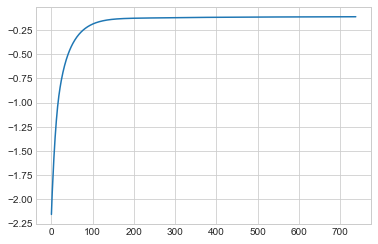

integral = 1.001091555885912
sigma = 1, lambda = 0.022912722773984193, mu = 0.00024362253723096065
Finished after 401 iterations
Integral tracker values : 401,67


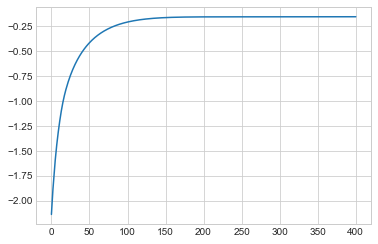

integral = 1.0046951596462115
sigma = 1, lambda = 0.022912722773984193, mu = 0.00024362253723096065
Finished after 580 iterations
Integral tracker values : 580,245


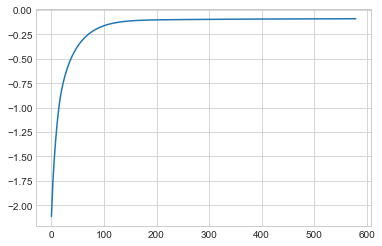

integral = 0.9977575603996415
sigma = 1, lambda = 0.022912722773984193, mu = 0.00024362253723096065
Integral tracker values : 739,380


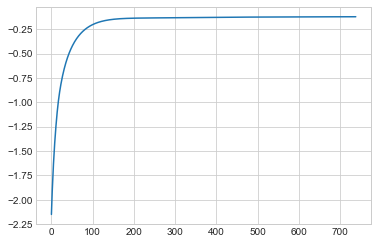

integral = 0.9988864118532828
[1.05039298 0.89670964 1.02320366 0.93939685 1.22742057 0.80069646
 0.98777573]
sigma = 1, lambda = 0.16684784868559935, mu = 3.274061541320525e-05
Finished after 1453 iterations
Integral tracker values : 1453,243


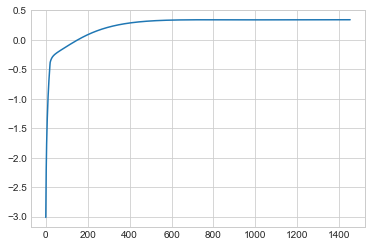

integral = 1.0061917152912383
sigma = 1, lambda = 0.16684784868559935, mu = 3.274061541320525e-05
Integral tracker values : 1846,0


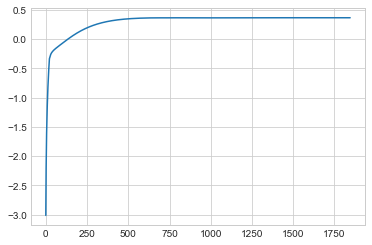

integral = 1.0117120847209997
[1.33862195 1.19717807]
sigma = 1, lambda = 0.04285611718667939, mu = 1.4440145920235685e-06
Finished after 6662 iterations
Integral tracker values : 6662,1111


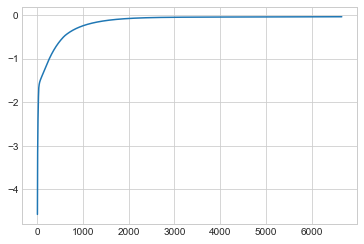

integral = 1.0053986798804984
sigma = 1, lambda = 0.04285611718667939, mu = 1.4440145920235685e-06
Finished after 6622 iterations
Integral tracker values : 6622,1104


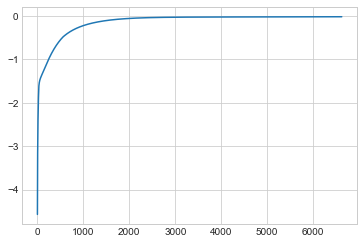

integral = 1.0050124431366978
sigma = 1, lambda = 0.04285611718667939, mu = 1.4440145920235685e-06
Finished after 6691 iterations
Integral tracker values : 6691,1116


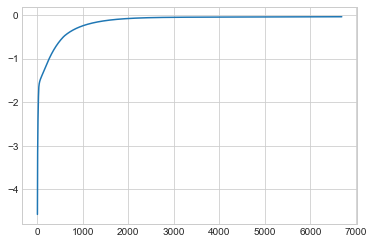

integral = 1.004509119288261
sigma = 1, lambda = 0.04285611718667939, mu = 1.4440145920235685e-06
Finished after 6730 iterations
Integral tracker values : 6730,1122


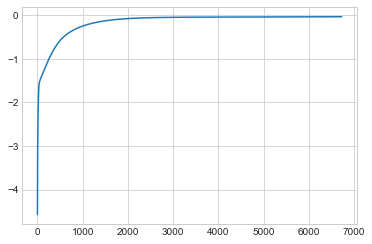

integral = 1.0058106208998927
sigma = 1, lambda = 0.04285611718667939, mu = 1.4440145920235685e-06
Finished after 6680 iterations
Integral tracker values : 6680,1114


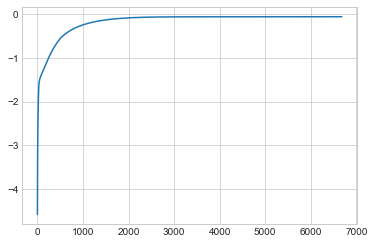

integral = 1.0048022181311325
sigma = 1, lambda = 0.04285611718667939, mu = 1.4440145920235685e-06
Finished after 6358 iterations
Integral tracker values : 6358,1060


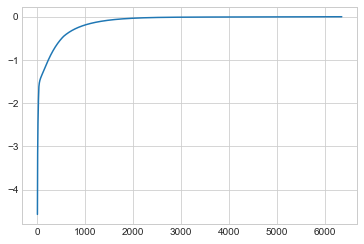

integral = 1.0043033051926007
sigma = 1, lambda = 0.04285611718667939, mu = 1.4440145920235685e-06
Finished after 6801 iterations
Integral tracker values : 6801,1134


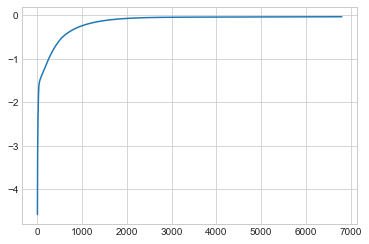

integral = 1.0052883803938495
[1.04835566 0.90813888 1.03129597 0.9747955  1.25870287 0.81180182
 1.01789692]
sigma = 1, lambda = 0.0003763426968557542, mu = 0.0006920710874490354
Finished after 280 iterations
Integral tracker values : 280,66


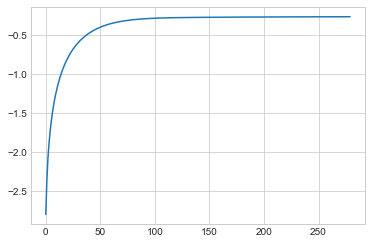

integral = 1.008394521646785
sigma = 1, lambda = 0.0003763426968557542, mu = 0.0006920710874490354
Finished after 265 iterations
Integral tracker values : 265,66


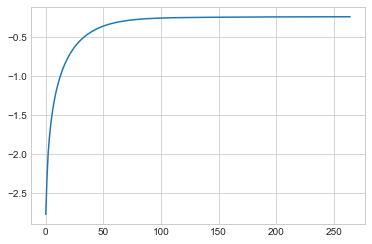

integral = 1.0082193347758224
sigma = 1, lambda = 0.0003763426968557542, mu = 0.0006920710874490354
Finished after 385 iterations
Integral tracker values : 385,171


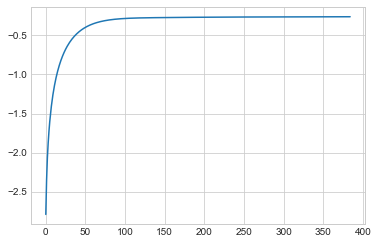

integral = 0.9966405809154033
sigma = 1, lambda = 0.0003763426968557542, mu = 0.0006920710874490354
Finished after 415 iterations
Integral tracker values : 415,204


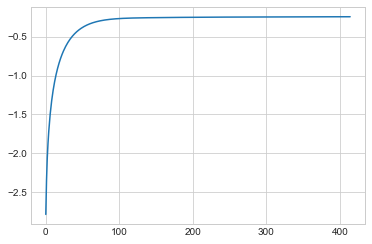

integral = 0.9973270359247276
sigma = 1, lambda = 0.0003763426968557542, mu = 0.0006920710874490354
Finished after 242 iterations
Integral tracker values : 242,41


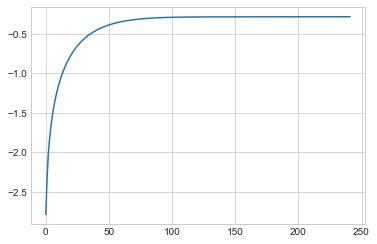

integral = 1.0051829363361047
sigma = 1, lambda = 0.0003763426968557542, mu = 0.0006920710874490354
Finished after 350 iterations
Integral tracker values : 350,149


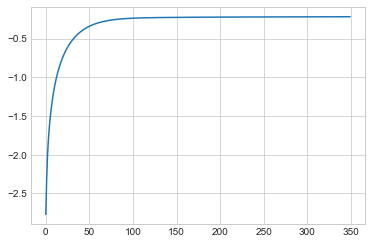

integral = 0.9963428337301368
sigma = 1, lambda = 0.0003763426968557542, mu = 0.0006920710874490354
Finished after 425 iterations
Integral tracker values : 425,220


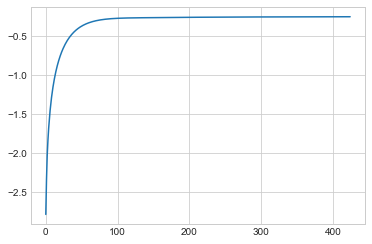

integral = 1.000137477930887
[1.03214483 0.8626124  1.00628127 0.92474059 1.18946275 0.75856024
 0.95339942]
sigma = 1, lambda = 0.00036551989014687984, mu = 1.7821204007760248e-06
Finished after 4568 iterations
Integral tracker values : 4568,762


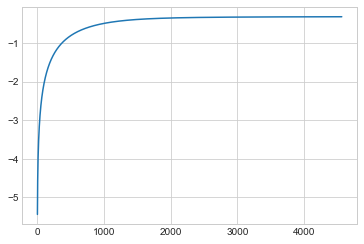

integral = 1.0012425596761365
sigma = 1, lambda = 0.00036551989014687984, mu = 1.7821204007760248e-06
Finished after 5141 iterations
Integral tracker values : 5141,857


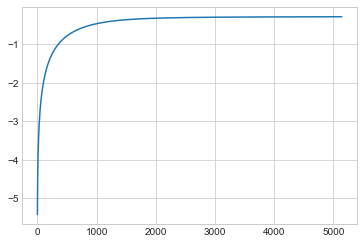

integral = 1.0072673592720658
sigma = 1, lambda = 0.00036551989014687984, mu = 1.7821204007760248e-06
Finished after 5134 iterations
Integral tracker values : 5134,856


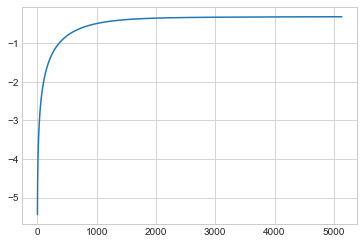

integral = 1.0043115905828817
sigma = 1, lambda = 0.00036551989014687984, mu = 1.7821204007760248e-06
Integral tracker values : 7589,932


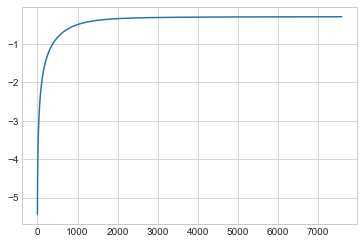

integral = 1.0075099529858789
sigma = 1, lambda = 0.00036551989014687984, mu = 1.7821204007760248e-06
Finished after 5473 iterations
Integral tracker values : 5473,913


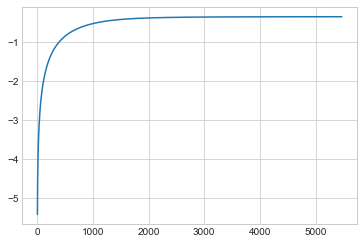

integral = 1.0070954127077947
sigma = 1, lambda = 0.00036551989014687984, mu = 1.7821204007760248e-06
Finished after 4718 iterations
Integral tracker values : 4718,787


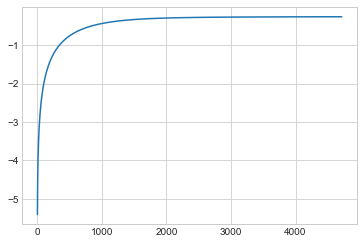

integral = 1.000153044109352
sigma = 1, lambda = 0.00036551989014687984, mu = 1.7821204007760248e-06
Finished after 6057 iterations
Integral tracker values : 6057,1010


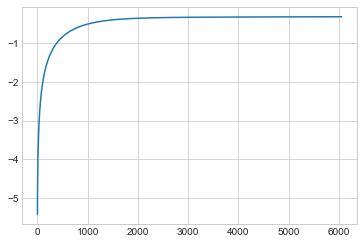

integral = 0.995460782699462
[1.01812769 0.81081824 0.97075092 0.9045152  1.23508991 0.66739464
 0.97779197]



In [11]:
prun = PrunedCVbis(7, 0.05,minimize = True)
study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective(trial, data_set,  
                                       utils.QuadraticEstimator,prun), 
               n_trials=10, show_progress_bar=True, n_jobs=1);

In [12]:
study.trials_dataframe()

number     value             datetime_start          datetime_complete  \
0       0  1.363546 2020-10-16 10:00:06.252135 2020-10-16 10:01:01.204548   
1       1  0.981350 2020-10-16 10:01:01.206183 2020-10-16 10:02:08.457581   
2       2  0.993734 2020-10-16 10:02:08.458955 2020-10-16 10:02:24.579371   
3       3  1.141611 2020-10-16 10:02:24.580782 2020-10-16 10:02:36.651720   
4       4  0.979449 2020-10-16 10:02:36.653217 2020-10-16 10:03:34.667466   
5       5  0.989371 2020-10-16 10:03:34.668929 2020-10-16 10:03:47.668402   
6       6  1.267900 2020-10-16 10:03:47.670114 2020-10-16 10:03:57.115630   
7       7  1.007284 2020-10-16 10:03:57.117245 2020-10-16 10:06:10.554212   
8       8  0.961029 2020-10-16 10:06:10.555634 2020-10-16 10:06:18.380213   
9       9  0.940641 2020-10-16 10:06:18.381597 2020-10-16 10:08:08.599664   

         duration  params_la  params_mu  user_attrs_accuracy  \
0 00:00:54.952413   0.579331   0.000004             1.363546   
1 00:01:07.251398   0.019489   0.000006             0.981350   
2 00:00:16.120416   0.024507   0.000213             0.993734   
3 00:00:12.070938   0.118830   0.000024             1.141611   
4 00:00:58.014249   0.018404   0.000008             0.979449   
5 00:00:12.999473   0.022913   0.000244             0.989371   
6 00:00:09.445516   0.166848   0.000033             1.267900   
7 00:02:13.436967   0.042856   0.000001             1.007284   
8 00:00:07.824579   0.000376   0.000692             0.961029   
9 00:01:50.218067   0.000366   0.000002             0.940641   

   user_attrs_len_cv  user_attrs_std     state  
0                  7        0.051694  COMPLETE  
1                  7        0.124695  COMPLETE  
2                  7        0.123226  COMPLETE  
3                  2        0.068156  COMPLETE  
4                  7        0.124629  COMPLETE  
5                  7        0.124338  COMPLETE  
6                  2        0.070722  COMPLETE  
7                  7        0.127999  COMPLETE  
8                  7        0.126119  COMPLETE  
9                  7        0.163800  COMPLETE

In [24]:
best_params = {'sigma' : 1, 
            'Niter' : 'auto',
            'mu_base' : mu_base,
            'eta_base' : eta_base
           }
for key in study.best_params.keys():
    best_params[key] = study.best_params[key]

sigma = 1, lambda = 0.00036551989014687984, mu = 1.7821204007760248e-06
Finished after 5642 iterations
Integral tracker values : 5642,941


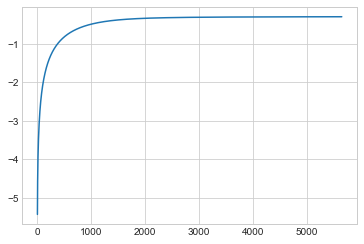

In [25]:
model = utils.QuadraticEstimator(**best_params)
model.fit(data_set)

{'Niter': 'auto', 'eta_base': 5, 'la': 0.002154434690031882, 'mu': 0.00046415888336127773, 'mu_base': tensor([0.]), 'sigma': 1}
sigma = 1, lambda = 0.002154434690031882, mu = 0.00046415888336127773
Finished after 440 iterations
Integral tracker values : 440,185


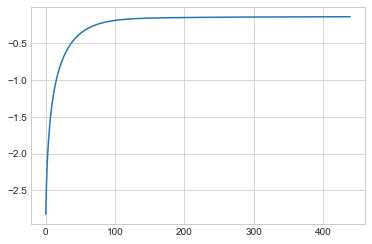

In [19]:
version = 1
filename = f'models/our_model_1D_{version}.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
df = pd.DataFrame(loaded_model['cross_valid'])
data_set = loaded_model['data_set']
params_best = df[df['rank_test_score'] == 1].iloc[0]['params']
print(params_best)
model = utils.QuadraticEstimator(**params_best)
model.fit(data_set)

In [20]:
df

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_Niter  \
0       18.030776      3.450421         0.002359        0.000089        auto   
1        4.195518      0.767030         0.002365        0.000049        auto   
2        1.127739      0.192162         0.002334        0.000063        auto   
3        0.293080      0.009318         0.002206        0.000160        auto   
4       18.334845      2.976535         0.002300        0.000090        auto   
5        4.568544      0.496406         0.002410        0.000072        auto   
6        1.225013      0.257944         0.002331        0.000039        auto   
7        0.319706      0.037092         0.002311        0.000210        auto   
8       23.731344      4.092876         0.002338        0.000177        auto   
9        5.197838      0.977497         0.002350        0.000116        auto   
10       1.288060      0.186890         0.002443        0.000273        auto   
11       0.304821      0.029462         0.002417        0.000238        auto   
12       9.082664      1.186086         0.002395        0.000194        auto   
13       1.948470      0.226434         0.002673        0.000215        auto   
14       0.360702      0.083803         0.002441        0.000194        auto   
15       0.251519      0.016307         0.002106        0.000108        auto   

   param_eta_base    param_la     param_mu param_mu_base param_sigma  \
0               5      0.0001        1e-06  [tensor(0.)]           1   
1               5      0.0001  2.15443e-05  [tensor(0.)]           1   
2               5      0.0001  0.000464159  [tensor(0.)]           1   
3               5      0.0001         0.01  [tensor(0.)]           1   
4               5  0.00215443        1e-06  [tensor(0.)]           1   
5               5  0.00215443  2.15443e-05  [tensor(0.)]           1   
6               5  0.00215443  0.000464159  [tensor(0.)]           1   
7               5  0.00215443         0.01  [tensor(0.)]           1   
8               5   0.0464159        1e-06  [tensor(0.)]           1   
9               5   0.0464159  2.15443e-05  [tensor(0.)]           1   
10              5   0.0464159  0.000464159  [tensor(0.)]           1   
11              5   0.0464159         0.01  [tensor(0.)]           1   
12              5           1        1e-06  [tensor(0.)]           1   
13              5           1  2.15443e-05  [tensor(0.)]           1   
14              5           1  0.000464159  [tensor(0.)]           1   
15              5           1         0.01  [tensor(0.)]           1   

                                               params  split0_test_score  \
0   {'Niter': 'auto', 'eta_base': 5, 'la': 0.0001,...          -0.876481   
1   {'Niter': 'auto', 'eta_base': 5, 'la': 0.0001,...          -0.882843   
2   {'Niter': 'auto', 'eta_base': 5, 'la': 0.0001,...          -0.911276   
3   {'Niter': 'auto', 'eta_base': 5, 'la': 0.0001,...          -1.002872   
4   {'Niter': 'auto', 'eta_base': 5, 'la': 0.00215...          -0.906902   
5   {'Niter': 'auto', 'eta_base': 5, 'la': 0.00215...          -0.904534   
6   {'Niter': 'auto', 'eta_base': 5, 'la': 0.00215...          -0.914075   
7   {'Niter': 'auto', 'eta_base': 5, 'la': 0.00215...          -1.006854   
8   {'Niter': 'auto', 'eta_base': 5, 'la': 0.04641...          -1.022287   
9   {'Niter': 'auto', 'eta_base': 5, 'la': 0.04641...          -1.010970   
10  {'Niter': 'auto', 'eta_base': 5, 'la': 0.04641...          -1.026326   
11  {'Niter': 'auto', 'eta_base': 5, 'la': 0.04641...          -1.093141   
12  {'Niter': 'auto', 'eta_base': 5, 'la': 1.0, 'm...          -1.382281   
13  {'Niter': 'auto', 'eta_base': 5, 'la': 1.0, 'm...          -1.382822   
14  {'Niter': 'auto', 'eta_base': 5, 'la': 1.0, 'm...          -1.383425   
15  {'Niter': 'auto', 'eta_base': 5, 'la': 1.0, 'm...          -1.379087   

    split1_test_score  split2_test_score  split3_test_score  \
0           -1.220798          -1.118069          -1.096010   

integral = 0.9997477434694086
integral = 0.9997477434694086


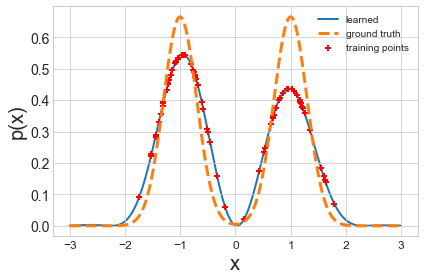

In [21]:
c,r,ntest = 0,3,100000
xtest = torch.linspace(c-r,c+r,ntest)

ytest = model.predict(xtest)
#print(ytest.sum()*(2*r)**d/ntest)
ydata_set = model.predict(data_set)
ytestref = density_fun(xtest)

fig = plt.figure()
plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
plt.scatter(data_set,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=1000)
plt.show()

# Nadaraya Watson

In [63]:
#Model

In [64]:
model = utils.NadarayaWatsonEstimator

In [65]:
#Data set 

In [66]:
X = data_set 

In [67]:
#Last version : 

In [68]:
last_version = utils_train.find_last_version(save_path,model = model,extension='pickle')
print(f'Last version to date : {last_version}')

Last version to date : 0


In [69]:
fixed_params = {
        'sigma' : 1, 
            'Niter' : 'auto',
            'mu_base' : mu_base,
            'eta_base' : eta_base
           }
variable_params = {
    'sigma' : ['uniform',0.1,1],
    'la' : ['loguniform',1e-6,1e0],
}


cv = 5
prune = True
n_trials =  20


n_jobs = 1
eta = 0



sigma = 0.5930548136435745, lambda = 0.1228256156166821
 norm of the constraint : 0.8003934577792576
Finished after 2640 iterations


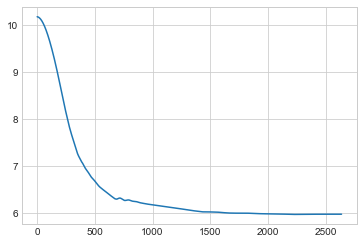

integral = tensor([[1.0000]])
sigma = 0.5930548136435745, lambda = 0.1228256156166821
 norm of the constraint : 0.8004412322334167
Finished after 2960 iterations


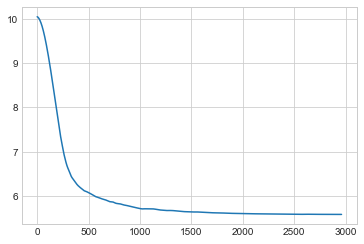

integral = tensor([[1.0000]])
sigma = 0.5930548136435745, lambda = 0.1228256156166821
 norm of the constraint : 0.8010779107221488
Finished after 2890 iterations


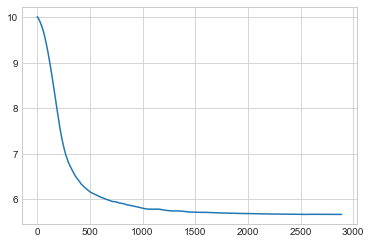

integral = tensor([[1.]])
sigma = 0.5930548136435745, lambda = 0.1228256156166821
 norm of the constraint : 0.8009256111313687
Finished after 2450 iterations


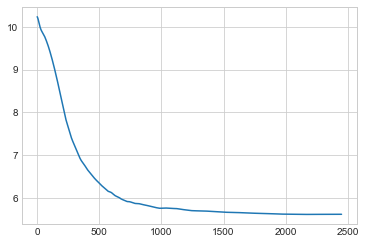

integral = tensor([[1.]])
sigma = 0.5930548136435745, lambda = 0.1228256156166821
 norm of the constraint : 0.8005025508415368
Finished after 5135 iterations


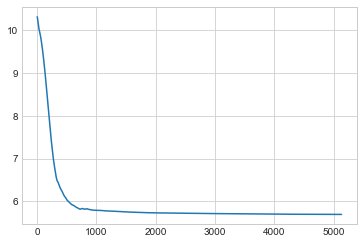

integral = tensor([[1.]])
servelastsplit
1.220420711477925
[1.21269502 1.21924371 1.22375557 1.22401425 1.22239501]
endservelastsplit
here we are 
1.220420711477925
[1.21269502 1.21924371 1.22375557 1.22401425 1.22239501]
sigma = 0.29798376273376415, lambda = 0.8332031301168882
 norm of the constraint : 0.40418210269872185
Finished after 455 iterations


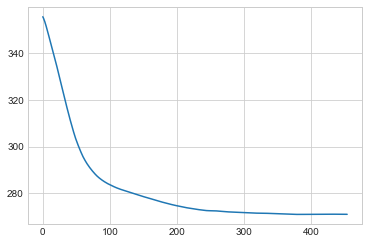

integral = tensor([[1.]])
sigma = 0.29798376273376415, lambda = 0.8332031301168882
 norm of the constraint : 0.40420650429390836
Finished after 390 iterations


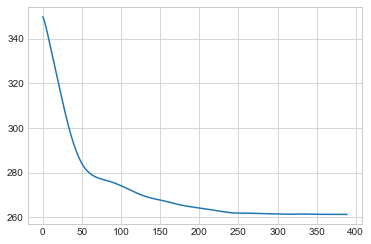

integral = tensor([[1.]])
sigma = 0.29798376273376415, lambda = 0.8332031301168882
 norm of the constraint : 0.4045314093969439
Finished after 435 iterations


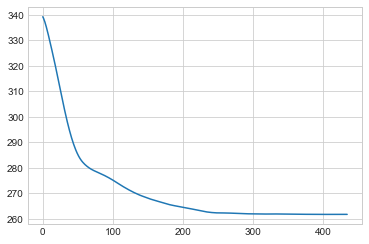

integral = tensor([[1.]])
sigma = 0.29798376273376415, lambda = 0.8332031301168882
 norm of the constraint : 0.4044536674331726
Finished after 370 iterations


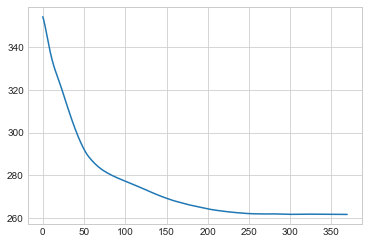

integral = tensor([[1.0000]])
sigma = 0.29798376273376415, lambda = 0.8332031301168882
 norm of the constraint : 0.404237782718275
Finished after 620 iterations


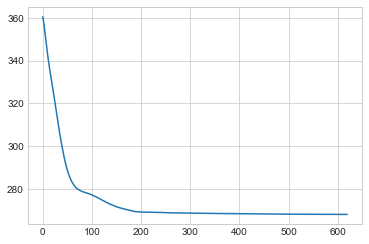

integral = tensor([[1.0000]])
servelastsplit
0.8102435816503993
[0.79284279 0.80805592 0.81252544 0.82572729 0.81206648]
endservelastsplit
here we are 
0.8102435816503993
[0.79284279 0.80805592 0.81252544 0.82572729 0.81206648]
sigma = 0.5709249538638563, lambda = 1.2257548331447022e-06
 norm of the constraint : 0.7709033385920694
Finished after 2860 iterations


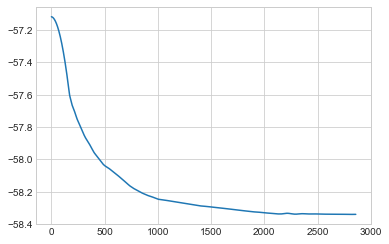

integral = tensor([[1.0000]])
sigma = 0.5709249538638563, lambda = 1.2257548331447022e-06
 norm of the constraint : 0.7709494039593635
Finished after 7500 iterations


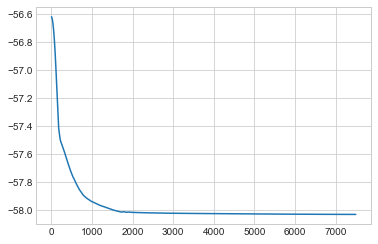

integral = tensor([[1.0000]])
here we are 
1.1019987137813827
[1.10164974 1.07570576]
sigma = 0.4298814638659916, lambda = 0.004559218434632029
 norm of the constraint : 0.5820177056957833
Finished after 2030 iterations


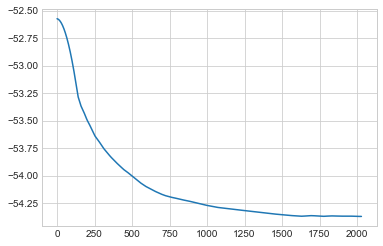

integral = tensor([[1.0000]])
sigma = 0.4298814638659916, lambda = 0.004559218434632029
 norm of the constraint : 0.5820526972966021
Finished after 5615 iterations


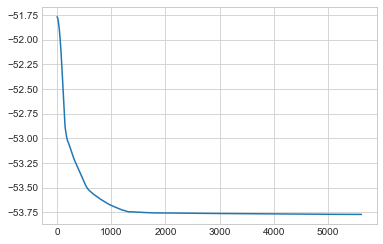

integral = tensor([[1.]])
here we are 
0.8620879169743307
[0.87684729 0.8264867 ]
sigma = 0.5032802899356834, lambda = 2.32926299530614e-06
 norm of the constraint : 0.680503818610128
Finished after 2365 iterations


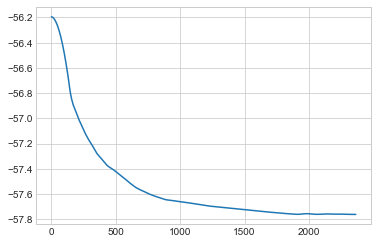

integral = tensor([[1.0000]])
sigma = 0.5032802899356834, lambda = 2.32926299530614e-06
 norm of the constraint : 0.6805446100358006
Finished after 2388 iterations


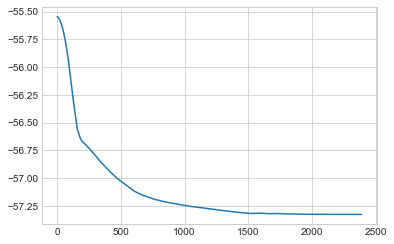

integral = tensor([[1.0000]])
here we are 
0.9952316650411979
[1.0006172 0.9657854]
sigma = 0.7265315566863413, lambda = 0.016886909337057745
 norm of the constraint : 0.9772769750630854


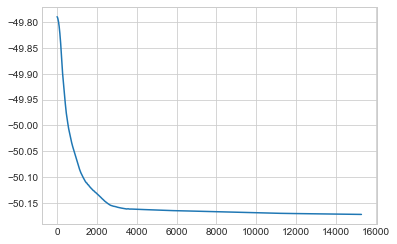

integral = tensor([[1.0000]])
sigma = 0.7265315566863413, lambda = 0.016886909337057745
 norm of the constraint : 0.9773348679640256
Finished after 11165 iterations


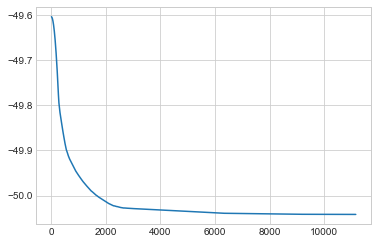

integral = tensor([[1.0000]])
here we are 
1.2898557174055285
[1.27979707 1.26873081]
sigma = 0.8178919265033563, lambda = 0.02436051233551366
 norm of the constraint : 1.097256127111346


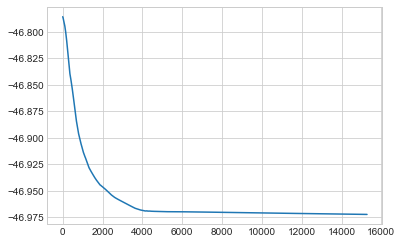

integral = tensor([[1.]])
sigma = 0.8178919265033563, lambda = 0.02436051233551366
 norm of the constraint : 1.0973207374450276
Finished after 11305 iterations


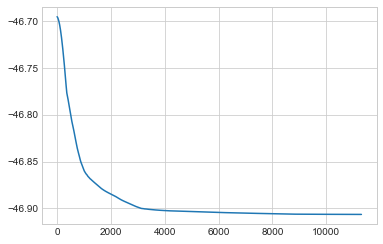

integral = tensor([[1.0000]])
here we are 
1.3637509049321639
[1.35019138 1.34434038]
sigma = 0.2209566140364651, lambda = 4.765492011645712e-05
 norm of the constraint : 0.2999329582945403
Finished after 1890 iterations


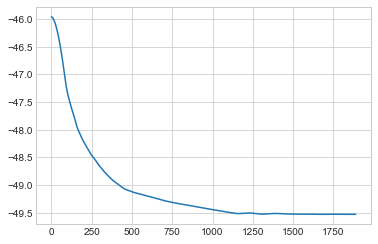

integral = tensor([[1.]])
sigma = 0.2209566140364651, lambda = 4.765492011645712e-05
 norm of the constraint : 0.29995109768217404
Finished after 5015 iterations


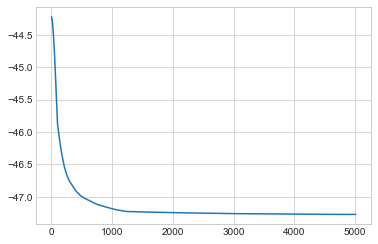

integral = tensor([[1.]])
sigma = 0.2209566140364651, lambda = 4.765492011645712e-05
 norm of the constraint : 0.3001925890208433
Finished after 2385 iterations


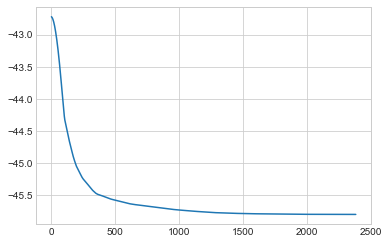

integral = tensor([[1.0000]])
sigma = 0.2209566140364651, lambda = 4.765492011645712e-05
 norm of the constraint : 0.3001348034970174
Finished after 4180 iterations


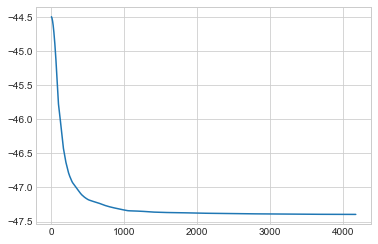

integral = tensor([[1.]])
sigma = 0.2209566140364651, lambda = 4.765492011645712e-05
 norm of the constraint : 0.2999743443981382
Finished after 4445 iterations


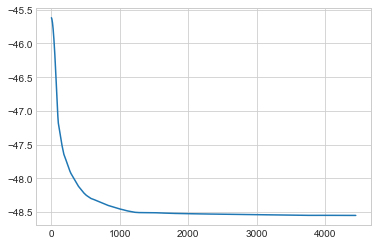

integral = tensor([[1.0000]])
servelastsplit
0.37890604124643523
[0.53115961 0.33219592 0.23370537 0.35578562 0.44168368]
endservelastsplit
here we are 
0.37890604124643523
[0.53115961 0.33219592 0.23370537 0.35578562 0.44168368]
sigma = 0.1640592069450563, lambda = 0.42847916867932917
 norm of the constraint : 0.2227923857027126
Finished after 460 iterations


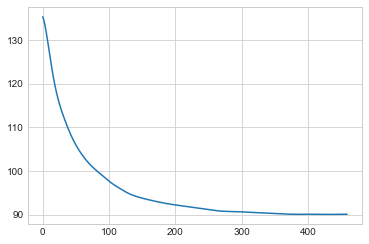

integral = tensor([[1.]])
sigma = 0.1640592069450563, lambda = 0.42847916867932917
 norm of the constraint : 0.22280587267144622
Finished after 485 iterations


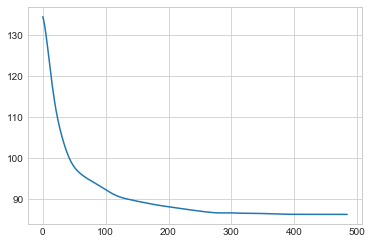

integral = tensor([[1.0000]])
here we are 
0.42592819787887254
[0.47791632 0.49258144]
sigma = 0.33335452556643735, lambda = 0.0001359685637791556
 norm of the constraint : 0.45196539846643596
Finished after 1762 iterations


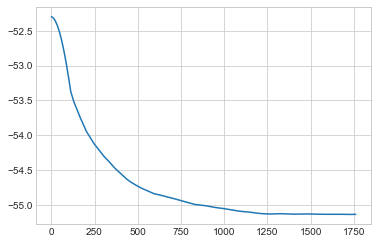

integral = tensor([[1.]])
sigma = 0.33335452556643735, lambda = 0.0001359685637791556
 norm of the constraint : 0.45199265833930036
Finished after 6150 iterations


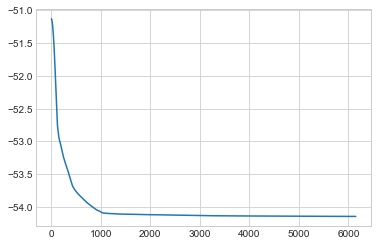

integral = tensor([[1.0000]])
here we are 
0.5770870759044959
[0.69961887 0.61530162]
sigma = 0.18168789296875193, lambda = 6.589852937378405e-05
 norm of the constraint : 0.24670327657734537
Finished after 1720 iterations


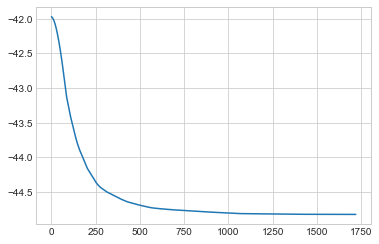

integral = tensor([[1.0000]])
sigma = 0.18168789296875193, lambda = 6.589852937378405e-05
 norm of the constraint : 0.24671820703974964
Finished after 4475 iterations


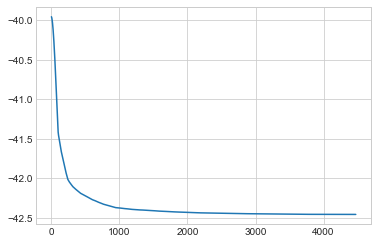

integral = tensor([[1.]])
sigma = 0.18168789296875193, lambda = 6.589852937378405e-05
 norm of the constraint : 0.24691696688914452
Finished after 1975 iterations


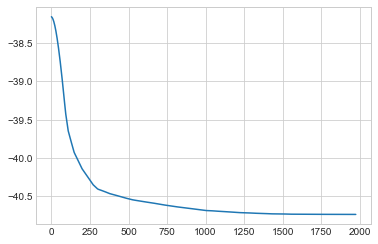

integral = tensor([[1.0000]])
sigma = 0.18168789296875193, lambda = 6.589852937378405e-05
 norm of the constraint : 0.24686940561325713
Finished after 4855 iterations


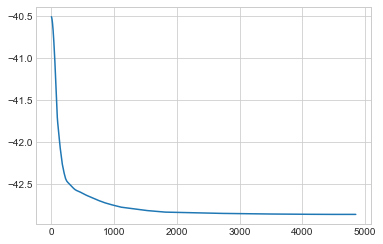

integral = tensor([[1.0000]])
sigma = 0.18168789296875193, lambda = 6.589852937378405e-05
 norm of the constraint : 0.24673733979410842
Finished after 5090 iterations


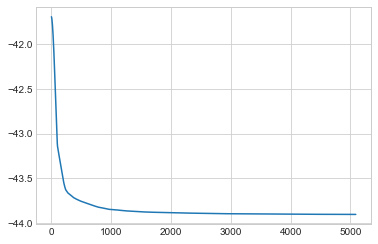

integral = tensor([[1.0000]])
servelastsplit
0.30228236628965444
[0.47364171 0.2537994  0.13599488 0.28418499 0.36379084]
endservelastsplit
here we are 
0.30228236628965444
[0.47364171 0.2537994  0.13599488 0.28418499 0.36379084]
sigma = 0.12365451759160634, lambda = 7.259660671752413e-05
 norm of the constraint : 0.16796030695351066
Finished after 6745 iterations


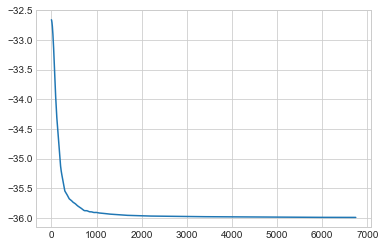

integral = tensor([[1.0000]])
sigma = 0.12365451759160634, lambda = 7.259660671752413e-05
 norm of the constraint : 0.1679704797734537
Finished after 3585 iterations


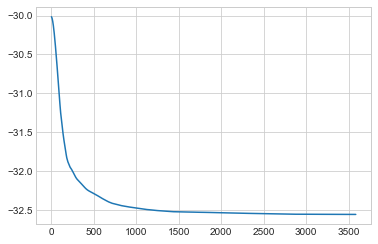

integral = tensor([[1.]])
sigma = 0.12365451759160634, lambda = 7.259660671752413e-05
 norm of the constraint : 0.16810589588751537
Finished after 7195 iterations


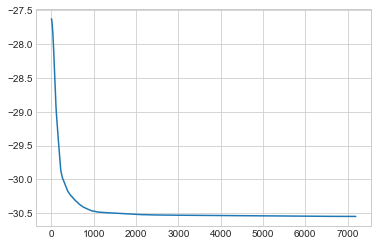

integral = tensor([[1.0000]])
sigma = 0.12365451759160634, lambda = 7.259660671752413e-05
 norm of the constraint : 0.16807349152936535
Finished after 4880 iterations


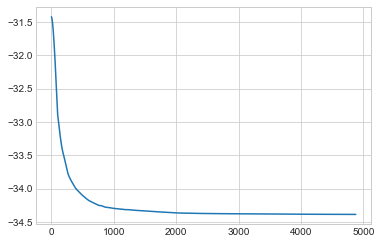

integral = tensor([[1.0000]])
sigma = 0.12365451759160634, lambda = 7.259660671752413e-05
 norm of the constraint : 0.16798351464030412
Finished after 7140 iterations


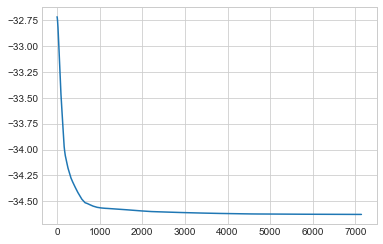

integral = tensor([[1.0000]])
servelastsplit
0.1343868507704441
[ 0.32246235  0.06787333 -0.10009364  0.17836551  0.20332671]
endservelastsplit
here we are 
0.1343868507704441
[ 0.32246235  0.06787333 -0.10009364  0.17836551  0.20332671]
sigma = 0.12708153215730128, lambda = 3.679313339933892e-05
 norm of the constraint : 0.17261238281563254
Finished after 4070 iterations


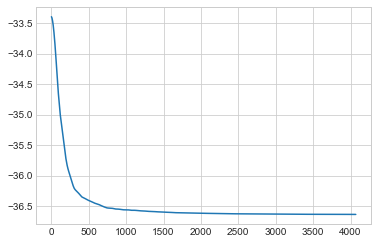

integral = tensor([[1.0000]])
sigma = 0.12708153215730128, lambda = 3.679313339933892e-05
 norm of the constraint : 0.17262283700419692
Finished after 3600 iterations


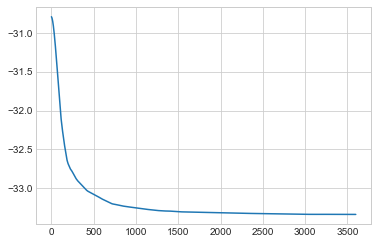

integral = tensor([[1.]])
sigma = 0.12708153215730128, lambda = 3.679313339933892e-05
 norm of the constraint : 0.17276199898449868
Finished after 2315 iterations


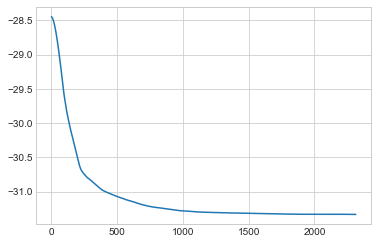

integral = tensor([[1.0000]])
here we are 
0.1487060130187647
[ 0.32696934  0.08007635 -0.08587784]
sigma = 0.9889373394991858, lambda = 8.938652692077661e-06
 norm of the constraint : 1.3191091055657407
Finished after 7890 iterations


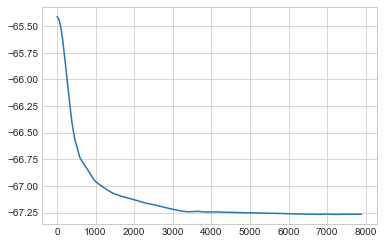

integral = tensor([[1.0000]])
sigma = 0.9889373394991858, lambda = 8.938652692077661e-06
 norm of the constraint : 1.319185771696717
Finished after 6070 iterations


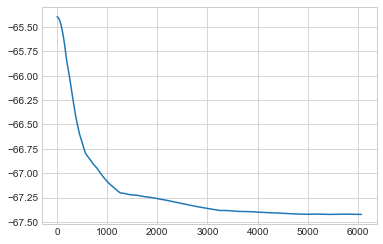

integral = tensor([[1.]])
here we are 
0.9636379803895956
[1.40156779 1.39738372]
sigma = 0.10690403957969341, lambda = 0.00036909742499648986
 norm of the constraint : 0.14521885269369564
Finished after 6455 iterations


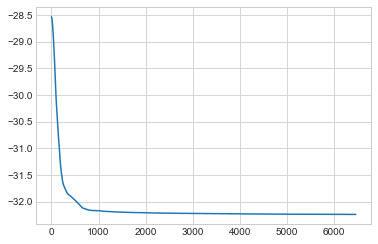

integral = tensor([[1.]])
sigma = 0.10690403957969341, lambda = 0.00036909742499648986
 norm of the constraint : 0.1452276496217507
Finished after 3235 iterations


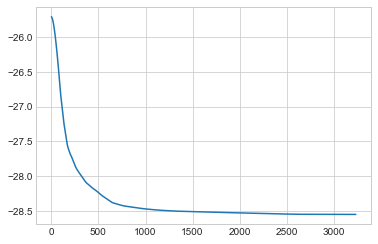

integral = tensor([[1.0000]])
sigma = 0.10690403957969341, lambda = 0.00036909742499648986
 norm of the constraint : 0.14534474891357682
Finished after 6345 iterations


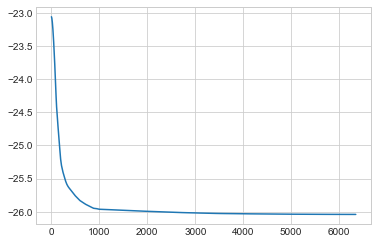

integral = tensor([[1.0000]])
sigma = 0.10690403957969341, lambda = 0.00036909742499648986
 norm of the constraint : 0.14531672755792246
Finished after 5450 iterations


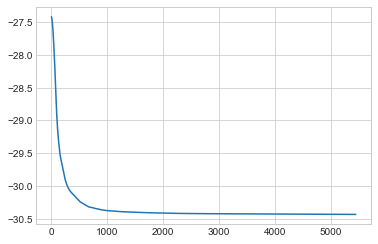

integral = tensor([[1.]])
sigma = 0.10690403957969341, lambda = 0.00036909742499648986
 norm of the constraint : 0.1452389212790408
Finished after 4645 iterations


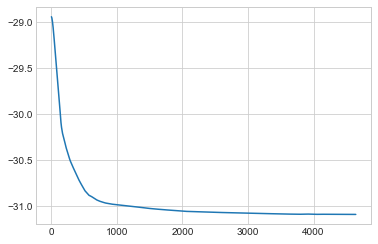

integral = tensor([[1.]])
servelastsplit
0.09976124061735354
[ 0.31967528  0.0071005  -0.19023637  0.15374594  0.20852085]
endservelastsplit
here we are 
0.09976124061735354
[ 0.31967528  0.0071005  -0.19023637  0.15374594  0.20852085]
sigma = 0.10215731126412335, lambda = 0.0005378728784947549
 norm of the constraint : 0.13877352409096838
Finished after 6370 iterations


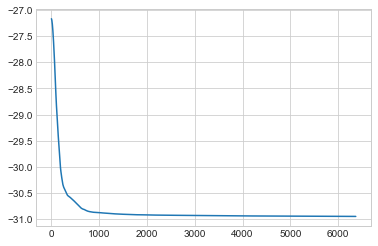

integral = tensor([[1.0000]])
sigma = 0.10215731126412335, lambda = 0.0005378728784947549
 norm of the constraint : 0.13878193094493382
Finished after 3125 iterations


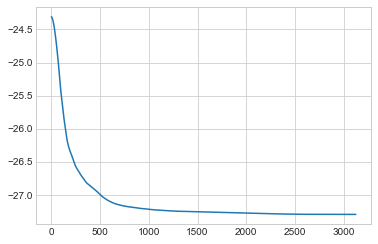

integral = tensor([[1.0000]])
sigma = 0.10215731126412335, lambda = 0.0005378728784947549
 norm of the constraint : 0.1388938374290613
Finished after 6140 iterations


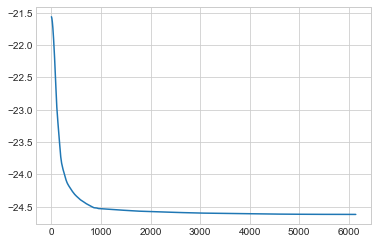

integral = tensor([[1.]])
sigma = 0.10215731126412335, lambda = 0.0005378728784947549
 norm of the constraint : 0.13886705866142093
Finished after 6135 iterations


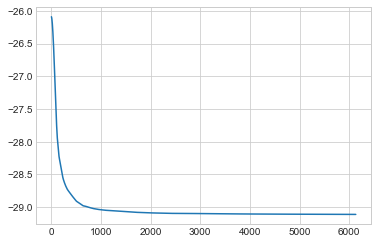

integral = tensor([[1.0000]])
sigma = 0.10215731126412335, lambda = 0.0005378728784947549
 norm of the constraint : 0.13879270273927047
Finished after 4295 iterations


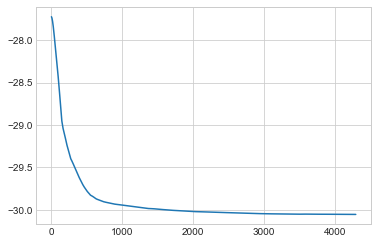

integral = tensor([[1.]])
servelastsplit
0.08265888053505403
[ 0.30916083 -0.00999923 -0.22566977  0.13096465  0.20883792]
endservelastsplit
here we are 
0.08265888053505403
[ 0.30916083 -0.00999923 -0.22566977  0.13096465  0.20883792]
sigma = 0.356384130310279, lambda = 0.0010132047243646557
 norm of the constraint : 0.4830423747880572
Finished after 1645 iterations


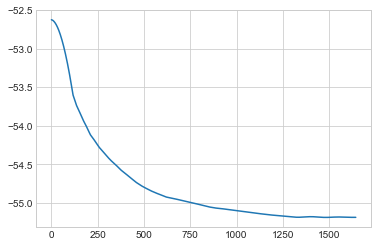

integral = tensor([[1.0000]])
sigma = 0.356384130310279, lambda = 0.0010132047243646557
 norm of the constraint : 0.48307148890237805
Finished after 6480 iterations


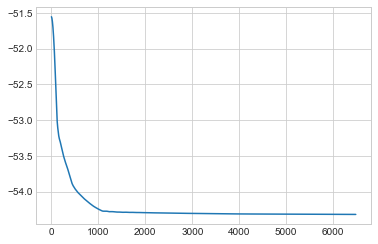

integral = tensor([[1.0000]])
here we are 
0.390106687373682
[0.74309888 0.6687874 ]
sigma = 0.10068582991652837, lambda = 0.0007001107667617265
 norm of the constraint : 0.13677540431880897
Finished after 5920 iterations


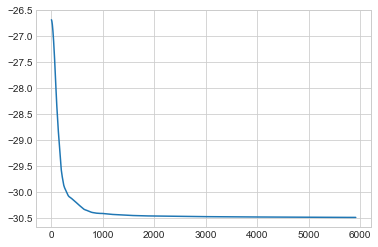

integral = tensor([[1.0000]])
sigma = 0.10068582991652837, lambda = 0.0007001107667617265
 norm of the constraint : 0.136783690235502
Finished after 3090 iterations


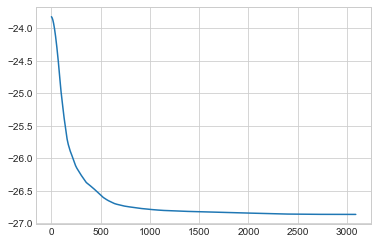

integral = tensor([[1.0000]])
sigma = 0.10068582991652837, lambda = 0.0007001107667617265
 norm of the constraint : 0.1368939867694798
Finished after 6050 iterations


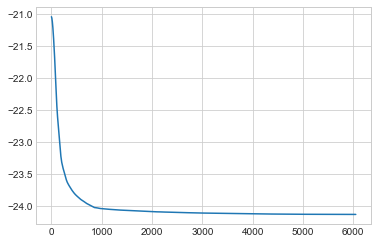

integral = tensor([[1.0000]])
sigma = 0.10068582991652837, lambda = 0.0007001107667617265
 norm of the constraint : 0.13686759324793546
Finished after 5900 iterations


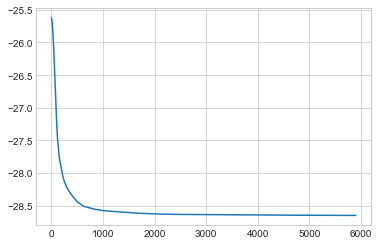

integral = tensor([[1.]])
sigma = 0.10068582991652837, lambda = 0.0007001107667617265
 norm of the constraint : 0.13679430705550813
Finished after 5774 iterations


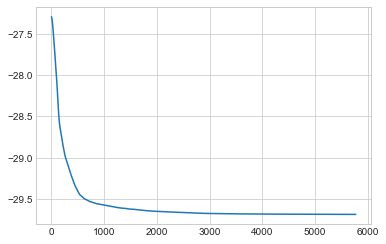

integral = tensor([[1.0000]])
servelastsplit
0.077222385045952
[ 0.30512057 -0.0154615  -0.23695187  0.12367231  0.20973242]
endservelastsplit
here we are 
0.077222385045952
[ 0.30512057 -0.0154615  -0.23695187  0.12367231  0.20973242]
sigma = 0.2566570208968752, lambda = 0.0006642287931534413
 norm of the constraint : 0.3482798509128678
Finished after 1920 iterations


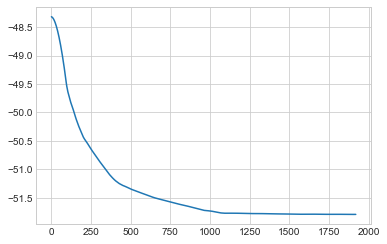

integral = tensor([[1.]])
sigma = 0.2566570208968752, lambda = 0.0006642287931534413
 norm of the constraint : 0.34830089856148844
Finished after 5405 iterations


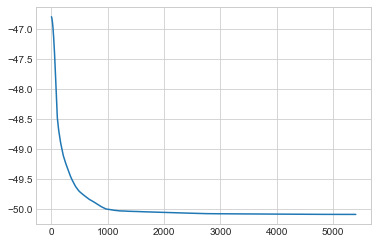

integral = tensor([[1.]])
here we are 
0.26520153845848937
[0.56862887 0.42613487]
sigma = 0.41254490766439667, lambda = 0.0030103882750271748
 norm of the constraint : 0.5587014076009936
Finished after 1930 iterations


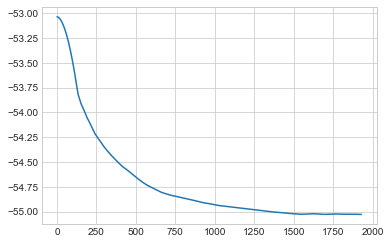

integral = tensor([[1.0000]])
sigma = 0.41254490766439667, lambda = 0.0030103882750271748
 norm of the constraint : 0.5587350187056196
Finished after 5385 iterations


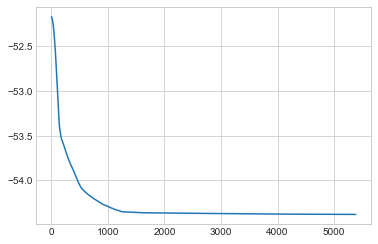

integral = tensor([[1.]])
here we are 
0.4364700493358159
[0.84608257 0.79110469]



In [70]:
r = utils_train.perform_study(model, X,fixed_params = fixed_params, variable_params = variable_params ,cv= cv, prune = prune,
                  n_trials = n_trials,save_path = save_path,version = None,eta = 0,n_jobs = 1)

In [71]:
version = None
df,best_params,aux = utils_train.get_results(save_path,model = model,version = version)
display(df)

number     value             datetime_start          datetime_complete  \
0        0  1.220421 2020-10-19 15:59:01.222325 2020-10-19 15:59:11.767376   
1        1  0.810244 2020-10-19 15:59:11.768670 2020-10-19 15:59:13.866341   
2        2  1.101999 2020-10-19 15:59:13.867703 2020-10-19 15:59:21.105408   
3        3  0.862088 2020-10-19 15:59:21.106756 2020-10-19 15:59:26.502166   
4        4  0.995232 2020-10-19 15:59:26.503487 2020-10-19 15:59:30.152802   
5        5  1.289856 2020-10-19 15:59:30.154102 2020-10-19 15:59:46.681682   
6        6  1.363751 2020-10-19 15:59:46.682979 2020-10-19 16:00:04.090847   
7        7  0.378906 2020-10-19 16:00:04.092219 2020-10-19 16:00:16.728640   
8        8  0.425928 2020-10-19 16:00:16.730031 2020-10-19 16:00:17.681208   
9        9  0.577087 2020-10-19 16:00:17.682756 2020-10-19 16:00:23.136554   
10      10  0.302282 2020-10-19 16:00:23.138057 2020-10-19 16:00:36.123013   
11      11  0.134387 2020-10-19 16:00:36.124193 2020-10-19 16:00:55.481138   
12      12  0.148706 2020-10-19 16:00:55.482629 2020-10-19 16:01:02.626943   
13      13  0.963638 2020-10-19 16:01:02.629230 2020-10-19 16:01:10.663040   
14      14  0.099761 2020-10-19 16:01:10.664505 2020-10-19 16:01:29.315309   
15      15  0.082659 2020-10-19 16:01:29.316514 2020-10-19 16:01:48.322645   
16      16  0.390107 2020-10-19 16:01:48.324631 2020-10-19 16:01:54.524038   
17      17  0.077222 2020-10-19 16:01:54.525479 2020-10-19 16:02:12.068325   
18      18  0.265202 2020-10-19 16:02:12.069596 2020-10-19 16:02:16.838926   
19      19  0.436470 2020-10-19 16:02:16.840237 2020-10-19 16:02:22.003661   

          duration  params_la  params_sigma  user_attrs_accuracy  \
0  00:00:10.545051   0.122826      0.593055             1.220421   
1  00:00:02.097671   0.833203      0.297984             0.810244   
2  00:00:07.237705   0.000001      0.570925             1.088678   
3  00:00:05.395410   0.004559      0.429881             0.851667   
4  00:00:03.649315   0.000002      0.503280             0.983201   
5  00:00:16.527580   0.016887      0.726532             1.274264   
6  00:00:17.407868   0.024361      0.817892             1.347266   
7  00:00:12.636421   0.000048      0.220957             0.378906   
8  00:00:00.951177   0.428479      0.164059             0.485249   
9  00:00:05.453798   0.000136      0.333355             0.657460   
10 00:00:12.984956   0.000066      0.181688             0.302282   
11 00:00:19.356945   0.000073      0.123655             0.134387   
12 00:00:07.144314   0.000037      0.127082             0.107056   
13 00:00:08.033810   0.000009      0.988937             1.399476   
14 00:00:18.650804   0.000369      0.106904             0.099761   
15 00:00:19.006131   0.000538      0.102157             0.082659   
16 00:00:06.199407   0.001013      0.356384             0.705943   
17 00:00:17.542846   0.000700      0.100686             0.077222   
18 00:00:04.769330   0.000664      0.256657             0.497382   
19 00:00:05.163424   0.003010      0.412545             0.818594   

                                    user_attrs_scores  user_attrs_std  \
0   [1.2126950163683963, 1.219243712245008, 1.2237...        0.004219   
1   [0.7928427901914322, 0.8080559196487641, 0.812...        0.010544   
2            [1.1016497439863786, 1.0757057563739765]        0.012972   
3            [0.8768472893079355, 0.8264867022330367]        0.025180   
4            [1.0006172011818888, 0.9657854024786235]        0.017416   
5             [1.279797067537543, 1.2687308080778645]        0.005533   
6            [1.3501913808986439, 1.3443403792940722]        0.002926   
7   [0.531159607253885, 0.3321959207333404, 0.2337...        0.100918   
8           [0.47791632450402055, 0.4925814351904376]        0.007333   
9             [0.6996188708280826, 0.615301618360126]        0.042159   
10  [0.4736417125744338, 0.2537994033453854, 0.135...        0.112674   
11  [0.3224623450157015, 0.06787332822053578, -0.1...       

In [72]:
eta = 0
params = aux(eta)
print(params)

{'sigma': 0.10068582991652837, 'la': 0.0007001107667617265, 'Niter': 'auto', 'mu_base': tensor([0.]), 'eta_base': 5}


sigma = 0.10068582991652837, lambda = 0.0007001107667617265
 norm of the constraint : 0.1529727698635748
Finished after 5715 iterations


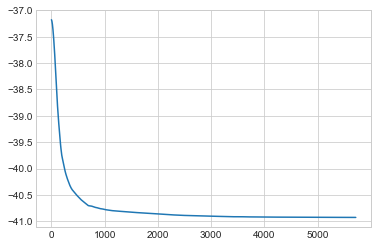

In [73]:
clf = model(**params)
clf.fit(X)

integral = tensor([[1.0000]])
integral = tensor([[1.0000]])


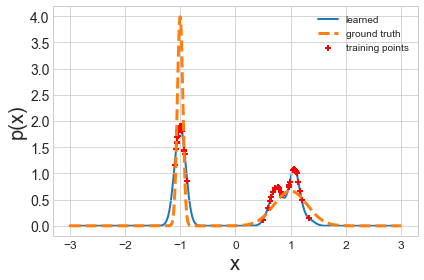

In [74]:
c,r,ntest = 0,3,100000
xtest = torch.linspace(c-r,c+r,ntest)

ytest = clf.predict(xtest)
#print(ytest.sum()*(2*r)**d/ntest)
ydata_set =clf.predict(data_set)
ytestref = density_fun(xtest)

fig = plt.figure()
plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
plt.scatter(data_set,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=1000)
plt.show()

In [13]:
version = find_last_version(path = 'models/nw_model_1D',extension = 'pickle')

print(f'last version number : {version}')

last version number : 1


sigma = 1, lambda = 1e-08
 norm of the constraint : 1.5399332496674758
Finished after 8045 iterations


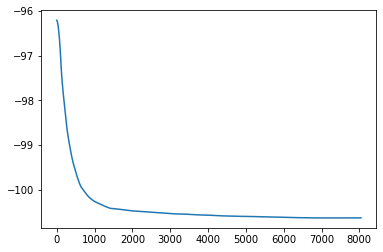

integral = tensor([[1.0000]])
sigma = 1, lambda = 1e-08
 norm of the constraint : 1.539551426990418
Finished after 5874 iterations


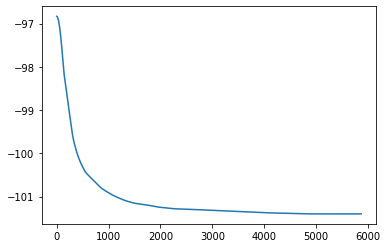

integral = tensor([[1.]])
sigma = 1, lambda = 1e-08
 norm of the constraint : 1.5405349350854882
Finished after 12140 iterations


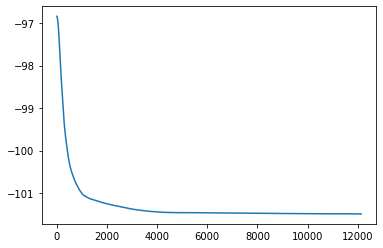

integral = tensor([[1.0000]])
sigma = 1, lambda = 1e-08
 norm of the constraint : 1.5380352381647036
Finished after 3460 iterations


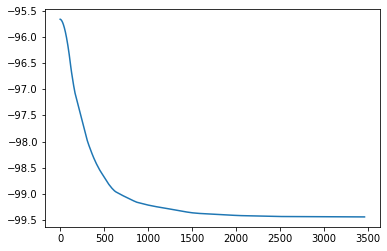

integral = tensor([[1.0000]])
sigma = 1, lambda = 1e-08
 norm of the constraint : 1.5410987498824118
Finished after 11390 iterations


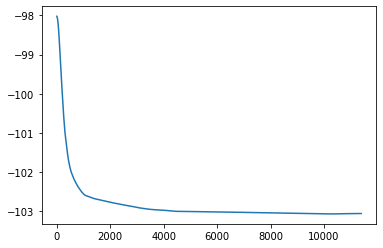

integral = tensor([[1.0000]])
sigma = 1, lambda = 2.6366508987303555e-08
 norm of the constraint : 1.5399332496674758
Finished after 8045 iterations


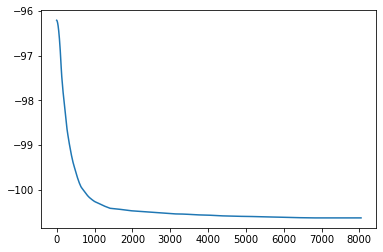

integral = tensor([[1.]])
sigma = 1, lambda = 2.6366508987303555e-08
 norm of the constraint : 1.539551426990418
Finished after 5874 iterations


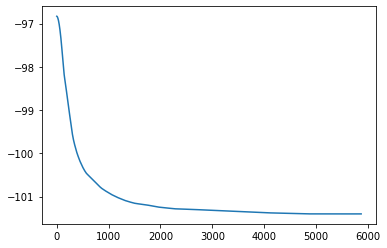

integral = tensor([[1.]])
sigma = 1, lambda = 2.6366508987303555e-08
 norm of the constraint : 1.5405349350854882
Finished after 12140 iterations


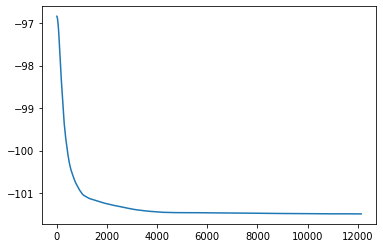

integral = tensor([[1.]])
sigma = 1, lambda = 2.6366508987303555e-08
 norm of the constraint : 1.5380352381647036
Finished after 3460 iterations


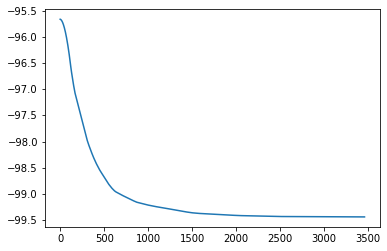

integral = tensor([[1.0000]])
sigma = 1, lambda = 2.6366508987303555e-08
 norm of the constraint : 1.5410987498824118
Finished after 12015 iterations


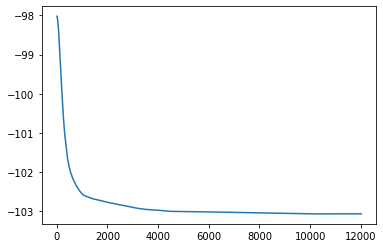

integral = tensor([[1.0000]])
sigma = 1, lambda = 6.951927961775605e-08
 norm of the constraint : 1.5399332496674758
Finished after 8045 iterations


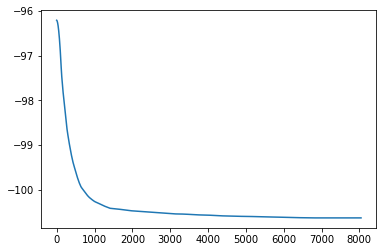

integral = tensor([[1.0000]])
sigma = 1, lambda = 6.951927961775605e-08
 norm of the constraint : 1.539551426990418
Finished after 5874 iterations


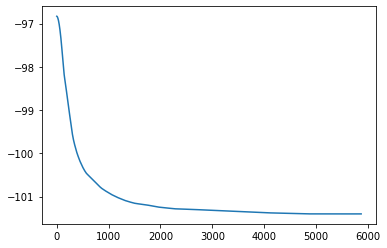

integral = tensor([[1.0000]])
sigma = 1, lambda = 6.951927961775605e-08
 norm of the constraint : 1.5405349350854882
Finished after 12140 iterations


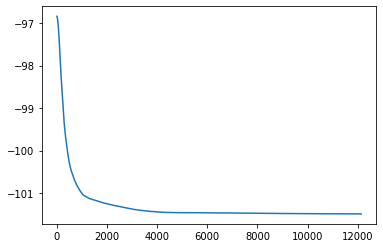

integral = tensor([[1.0000]])
sigma = 1, lambda = 6.951927961775605e-08
 norm of the constraint : 1.5380352381647036
Finished after 3460 iterations


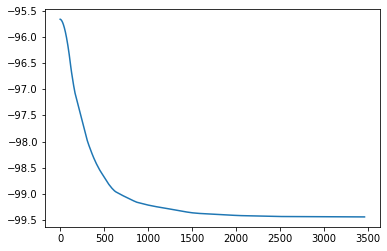

integral = tensor([[1.]])
sigma = 1, lambda = 6.951927961775605e-08
 norm of the constraint : 1.5410987498824118
Finished after 12015 iterations


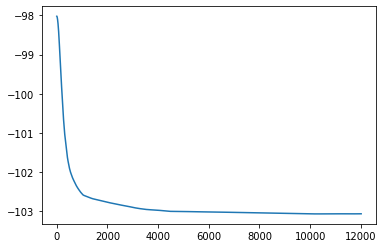

integral = tensor([[1.]])
sigma = 1, lambda = 1.8329807108324375e-07
 norm of the constraint : 1.5399332496674758
Finished after 8045 iterations


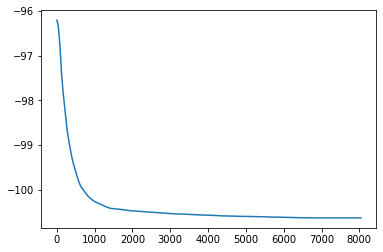

integral = tensor([[1.]])
sigma = 1, lambda = 1.8329807108324375e-07
 norm of the constraint : 1.539551426990418
Finished after 5875 iterations


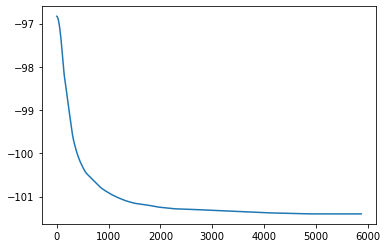

integral = tensor([[1.0000]])
sigma = 1, lambda = 1.8329807108324375e-07
 norm of the constraint : 1.5405349350854882
Finished after 12140 iterations


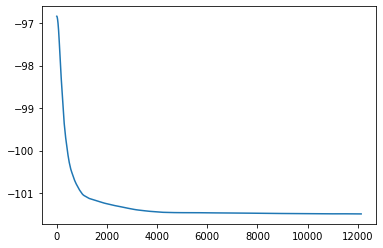

integral = tensor([[1.]])
sigma = 1, lambda = 1.8329807108324375e-07
 norm of the constraint : 1.5380352381647036
Finished after 3460 iterations


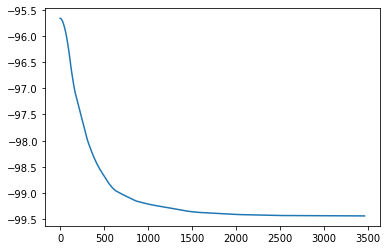

integral = tensor([[1.]])
sigma = 1, lambda = 1.8329807108324375e-07
 norm of the constraint : 1.5410987498824118
Finished after 12015 iterations


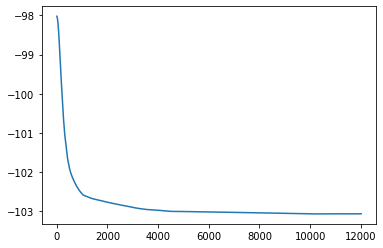

integral = tensor([[1.0000]])
sigma = 1, lambda = 4.832930238571752e-07
 norm of the constraint : 1.5399332496674758
Finished after 8045 iterations


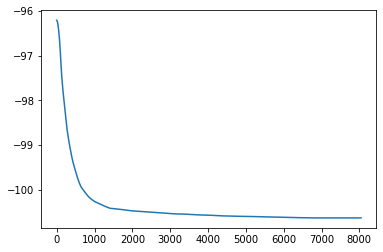

integral = tensor([[1.0000]])
sigma = 1, lambda = 4.832930238571752e-07
 norm of the constraint : 1.539551426990418
Finished after 5875 iterations


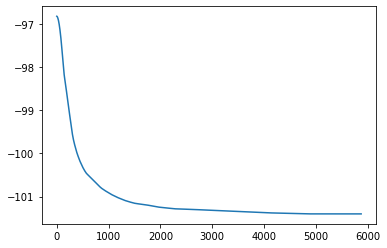

integral = tensor([[1.0000]])
sigma = 1, lambda = 4.832930238571752e-07
 norm of the constraint : 1.5405349350854882
Finished after 11395 iterations


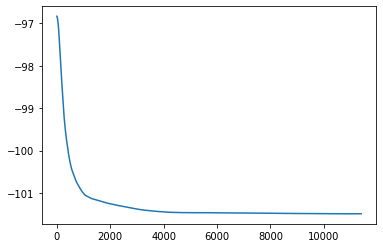

integral = tensor([[1.0000]])
sigma = 1, lambda = 4.832930238571752e-07
 norm of the constraint : 1.5380352381647036
Finished after 3460 iterations


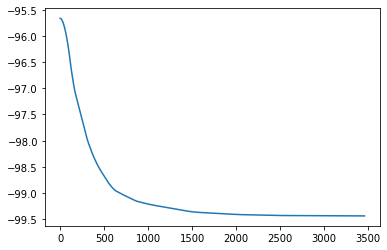

integral = tensor([[1.0000]])
sigma = 1, lambda = 4.832930238571752e-07
 norm of the constraint : 1.5410987498824118
Finished after 12015 iterations


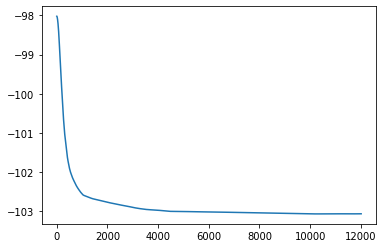

integral = tensor([[1.0000]])
sigma = 1, lambda = 1.2742749857031322e-06
 norm of the constraint : 1.5399332496674758
Finished after 8050 iterations


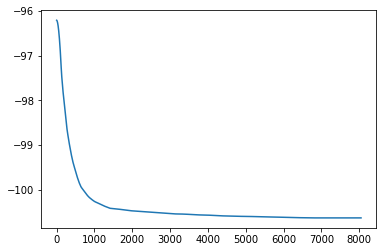

integral = tensor([[1.]])
sigma = 1, lambda = 1.2742749857031322e-06
 norm of the constraint : 1.539551426990418
Finished after 5875 iterations


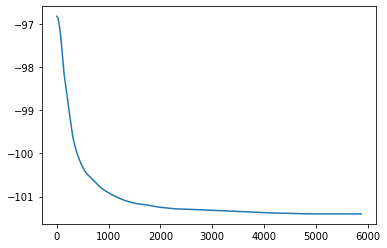

integral = tensor([[1.0000]])
sigma = 1, lambda = 1.2742749857031322e-06
 norm of the constraint : 1.5405349350854882
Finished after 12145 iterations


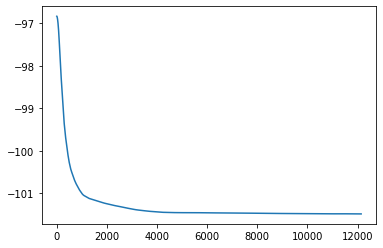

integral = tensor([[1.0000]])
sigma = 1, lambda = 1.2742749857031322e-06
 norm of the constraint : 1.5380352381647036
Finished after 3460 iterations


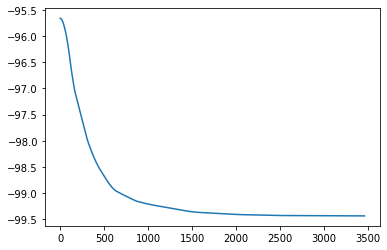

integral = tensor([[1.]])
sigma = 1, lambda = 1.2742749857031322e-06
 norm of the constraint : 1.5410987498824118
Finished after 12020 iterations


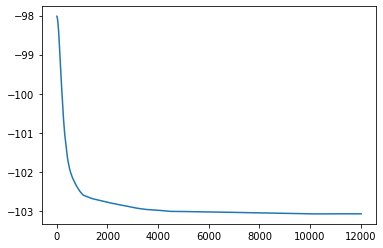

integral = tensor([[1.0000]])
sigma = 1, lambda = 3.359818286283781e-06
 norm of the constraint : 1.5399332496674758
Finished after 8055 iterations


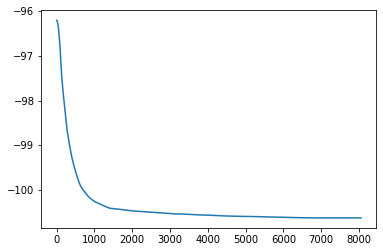

integral = tensor([[1.0000]])
sigma = 1, lambda = 3.359818286283781e-06
 norm of the constraint : 1.539551426990418
Finished after 5880 iterations


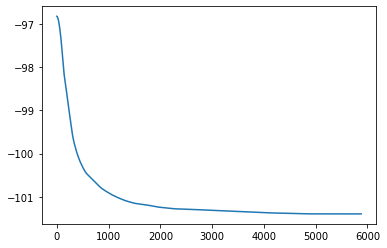

integral = tensor([[1.]])
sigma = 1, lambda = 3.359818286283781e-06
 norm of the constraint : 1.5405349350854882
Finished after 12155 iterations


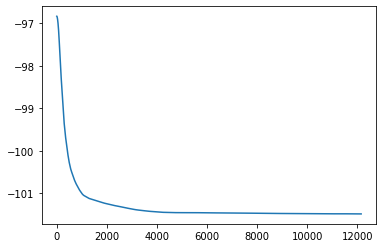

integral = tensor([[1.0000]])
sigma = 1, lambda = 3.359818286283781e-06
 norm of the constraint : 1.5380352381647036
Finished after 3460 iterations


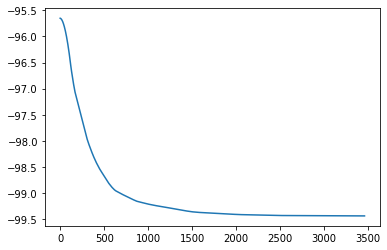

integral = tensor([[1.0000]])
sigma = 1, lambda = 3.359818286283781e-06
 norm of the constraint : 1.5410987498824118
Finished after 12028 iterations


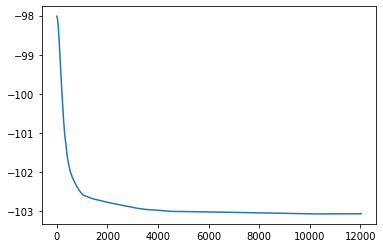

integral = tensor([[1.]])
sigma = 1, lambda = 8.858667904100832e-06
 norm of the constraint : 1.5399332496674758
Finished after 8070 iterations


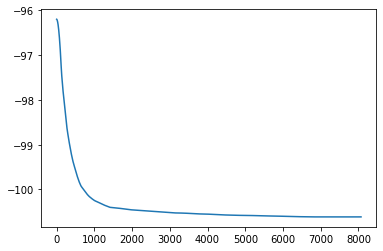

integral = tensor([[1.]])
sigma = 1, lambda = 8.858667904100832e-06
 norm of the constraint : 1.539551426990418
Finished after 5890 iterations


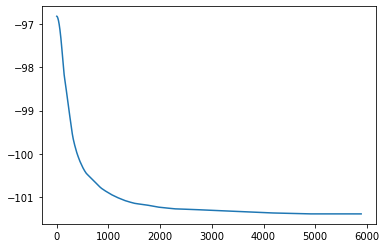

integral = tensor([[1.0000]])
sigma = 1, lambda = 8.858667904100832e-06
 norm of the constraint : 1.5405349350854882
Finished after 12180 iterations


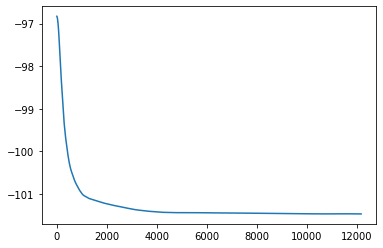

integral = tensor([[1.0000]])
sigma = 1, lambda = 8.858667904100832e-06
 norm of the constraint : 1.5380352381647036
Finished after 3464 iterations


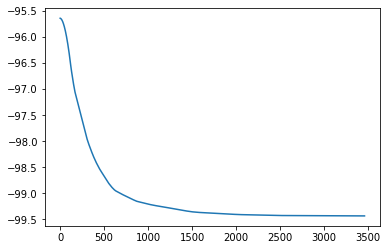

integral = tensor([[1.]])
sigma = 1, lambda = 8.858667904100832e-06
 norm of the constraint : 1.5410987498824118
Finished after 11096 iterations


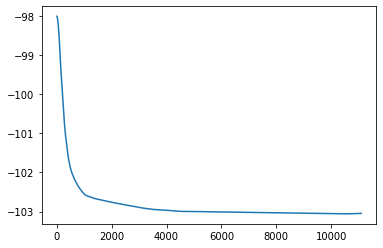

integral = tensor([[1.0000]])
sigma = 1, lambda = 2.3357214690901213e-05
 norm of the constraint : 1.5399332496674758
Finished after 8110 iterations


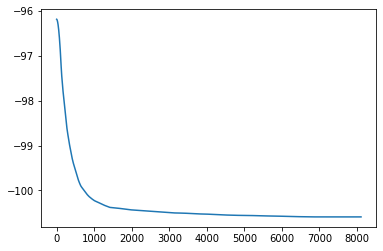

integral = tensor([[1.]])
sigma = 1, lambda = 2.3357214690901213e-05
 norm of the constraint : 1.539551426990418
Finished after 5915 iterations


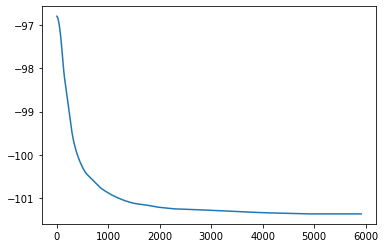

integral = tensor([[1.]])
sigma = 1, lambda = 2.3357214690901213e-05
 norm of the constraint : 1.5405349350854882
Finished after 12250 iterations


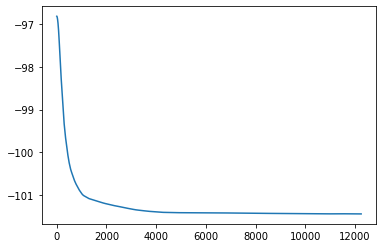

integral = tensor([[1.0000]])
sigma = 1, lambda = 2.3357214690901213e-05
 norm of the constraint : 1.5380352381647036
Finished after 3470 iterations


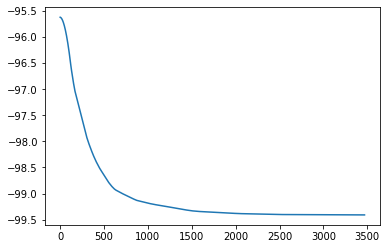

integral = tensor([[1.0000]])
sigma = 1, lambda = 2.3357214690901213e-05
 norm of the constraint : 1.5410987498824118
Finished after 12105 iterations


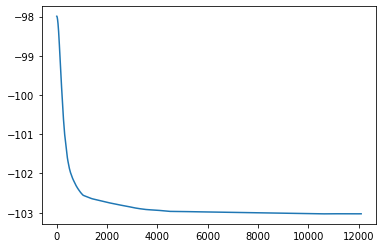

integral = tensor([[1.0000]])
sigma = 1, lambda = 6.158482110660255e-05
 norm of the constraint : 1.5399332496674758
Finished after 8220 iterations


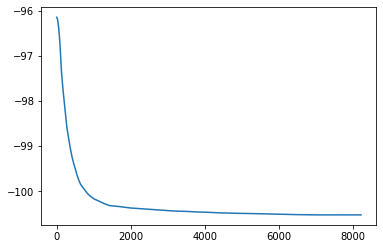

integral = tensor([[1.0000]])
sigma = 1, lambda = 6.158482110660255e-05
 norm of the constraint : 1.539551426990418
Finished after 5990 iterations


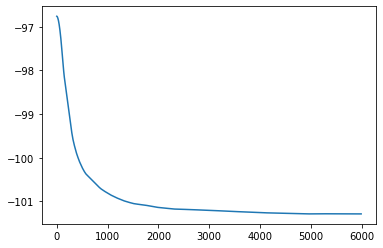

integral = tensor([[1.0000]])
sigma = 1, lambda = 6.158482110660255e-05
 norm of the constraint : 1.5405349350854882
Finished after 6020 iterations


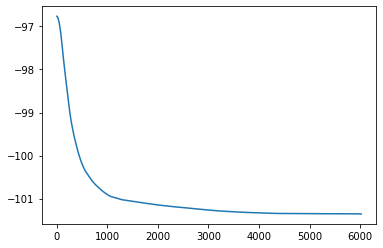

integral = tensor([[1.0000]])
sigma = 1, lambda = 6.158482110660255e-05
 norm of the constraint : 1.5380352381647036
Finished after 3492 iterations


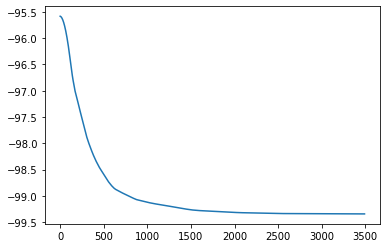

integral = tensor([[1.]])
sigma = 1, lambda = 6.158482110660255e-05
 norm of the constraint : 1.5410987498824118
Finished after 12260 iterations


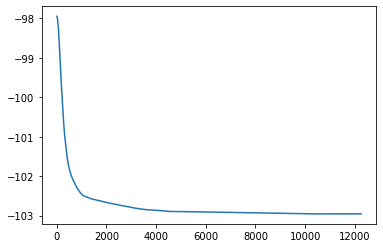

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0001623776739188721
 norm of the constraint : 1.5399332496674758
Finished after 8510 iterations


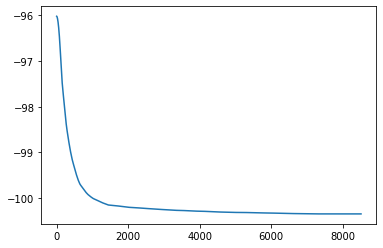

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0001623776739188721
 norm of the constraint : 1.539551426990418
Finished after 6210 iterations


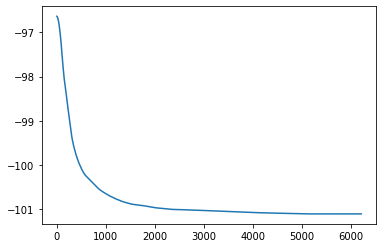

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0001623776739188721
 norm of the constraint : 1.5405349350854882
Finished after 6030 iterations


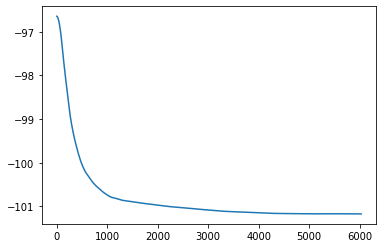

integral = tensor([[1.]])
sigma = 1, lambda = 0.0001623776739188721
 norm of the constraint : 1.5380352381647036
Finished after 3196 iterations


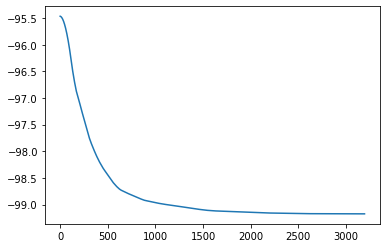

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0001623776739188721
 norm of the constraint : 1.5410987498824118
Finished after 12658 iterations


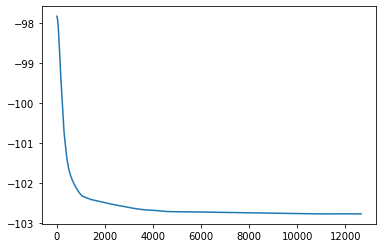

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.00042813323987193956
 norm of the constraint : 1.5399332496674758
Finished after 9230 iterations


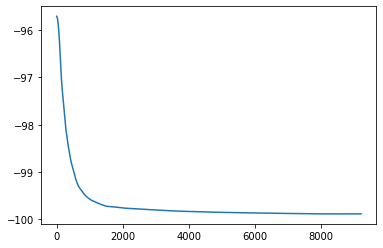

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.00042813323987193956
 norm of the constraint : 1.539551426990418
Finished after 6910 iterations


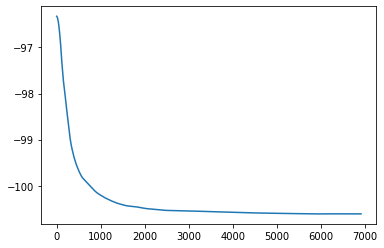

integral = tensor([[1.]])
sigma = 1, lambda = 0.00042813323987193956
 norm of the constraint : 1.5405349350854882
Finished after 5942 iterations


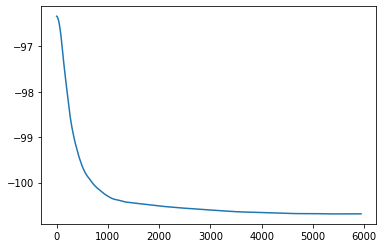

integral = tensor([[1.]])
sigma = 1, lambda = 0.00042813323987193956
 norm of the constraint : 1.5380352381647036
Finished after 3500 iterations


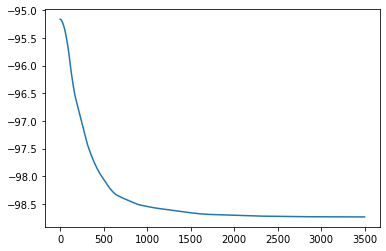

integral = tensor([[1.]])
sigma = 1, lambda = 0.00042813323987193956
 norm of the constraint : 1.5410987498824118
Finished after 13895 iterations


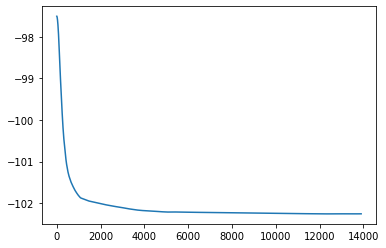

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0011288378916846883
 norm of the constraint : 1.5399332496674758
Finished after 8185 iterations


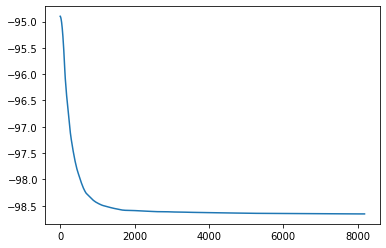

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0011288378916846883
 norm of the constraint : 1.539551426990418
Finished after 3740 iterations


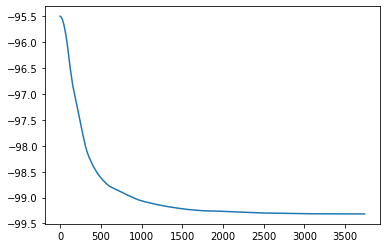

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0011288378916846883
 norm of the constraint : 1.5405349350854882
Finished after 7985 iterations


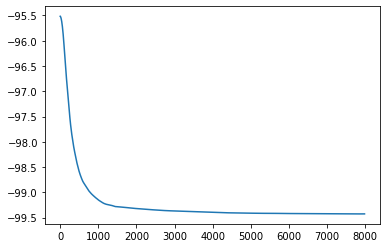

integral = tensor([[1.]])
sigma = 1, lambda = 0.0011288378916846883
 norm of the constraint : 1.5380352381647036
Finished after 5635 iterations


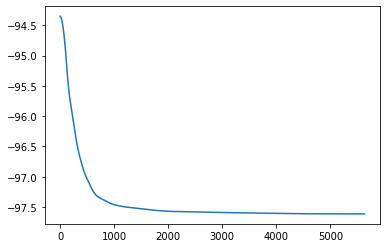

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0011288378916846883
 norm of the constraint : 1.5410987498824118
Finished after 7500 iterations


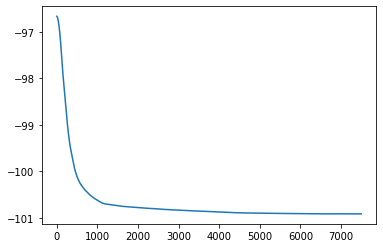

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.002976351441631313
 norm of the constraint : 1.5399332496674758
Finished after 7535 iterations


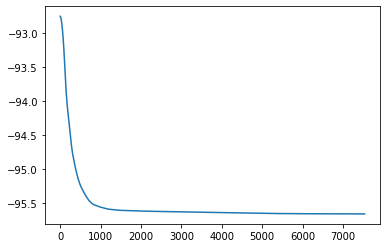

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.002976351441631313
 norm of the constraint : 1.539551426990418
Finished after 10510 iterations


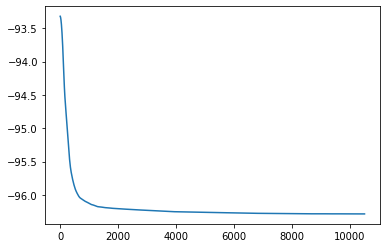

integral = tensor([[1.]])
sigma = 1, lambda = 0.002976351441631313
 norm of the constraint : 1.5405349350854882
Finished after 9285 iterations


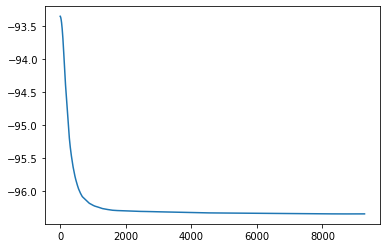

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.002976351441631313
 norm of the constraint : 1.5380352381647036
Finished after 20085 iterations


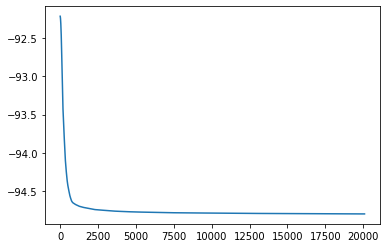

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.002976351441631313
 norm of the constraint : 1.5410987498824118
Finished after 3030 iterations


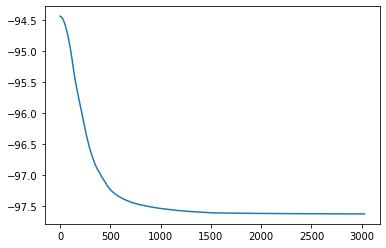

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.007847599703514606
 norm of the constraint : 1.5399332496674758
Finished after 13390 iterations


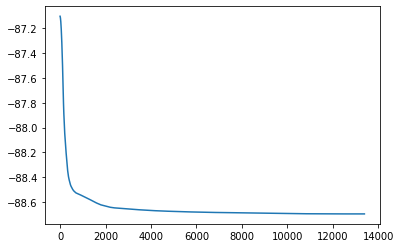

integral = tensor([[1.]])
sigma = 1, lambda = 0.007847599703514606
 norm of the constraint : 1.539551426990418
Finished after 9785 iterations


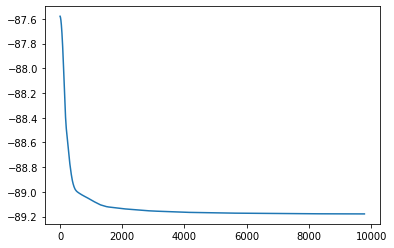

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.007847599703514606
 norm of the constraint : 1.5405349350854882
Finished after 18555 iterations


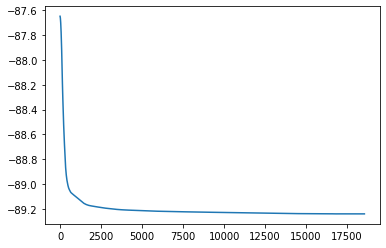

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.007847599703514606
 norm of the constraint : 1.5380352381647036
Finished after 12772 iterations


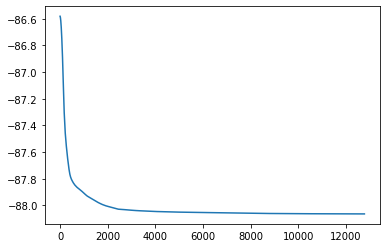

integral = tensor([[1.]])
sigma = 1, lambda = 0.007847599703514606
 norm of the constraint : 1.5410987498824118
Finished after 19965 iterations


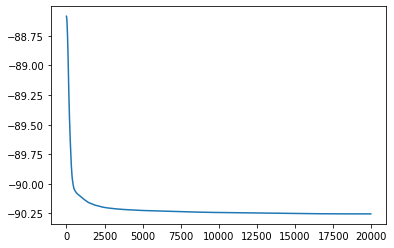

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0206913808111479
 norm of the constraint : 1.5399332496674758


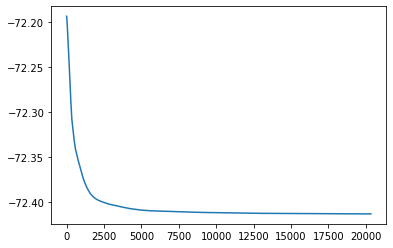

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0206913808111479
 norm of the constraint : 1.539551426990418


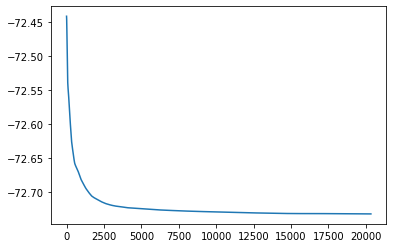

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0206913808111479
 norm of the constraint : 1.5405349350854882


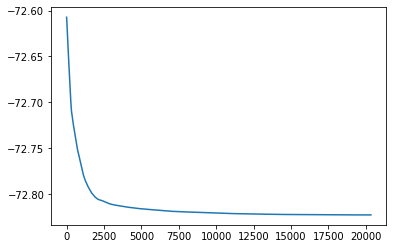

integral = tensor([[1.]])
sigma = 1, lambda = 0.0206913808111479
 norm of the constraint : 1.5380352381647036


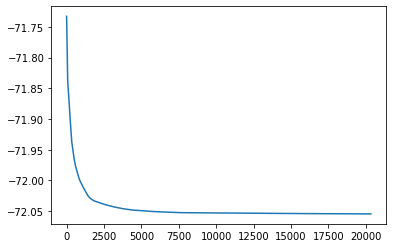

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0206913808111479
 norm of the constraint : 1.5410987498824118


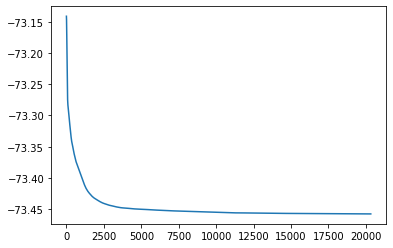

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.05455594781168514
 norm of the constraint : 1.5399332496674758
Finished after 4155 iterations


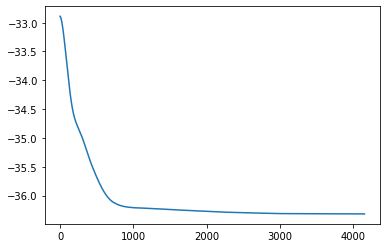

integral = tensor([[1.]])
sigma = 1, lambda = 0.05455594781168514
 norm of the constraint : 1.539551426990418
Finished after 3970 iterations


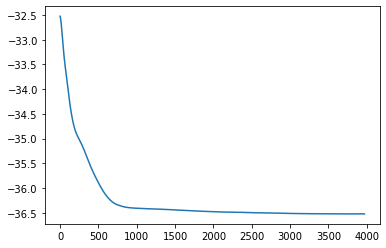

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.05455594781168514
 norm of the constraint : 1.5405349350854882
Finished after 3890 iterations


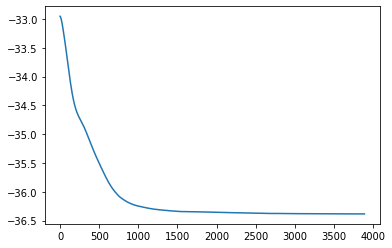

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.05455594781168514
 norm of the constraint : 1.5380352381647036
Finished after 3990 iterations


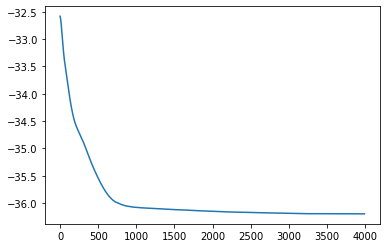

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.05455594781168514
 norm of the constraint : 1.5410987498824118
Finished after 4290 iterations


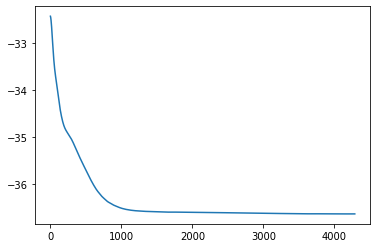

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.143844988828766
 norm of the constraint : 1.5399332496674758
Finished after 1410 iterations


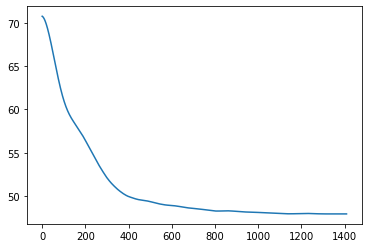

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.143844988828766
 norm of the constraint : 1.539551426990418
Finished after 1430 iterations


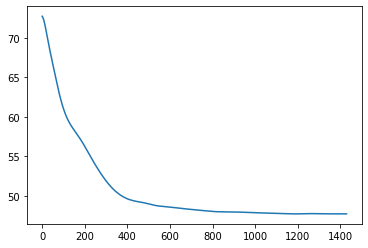

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.143844988828766
 norm of the constraint : 1.5405349350854882
Finished after 1755 iterations


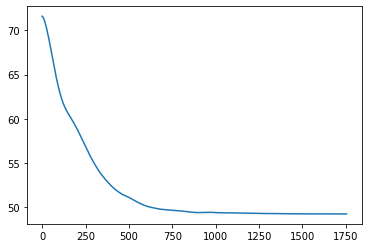

integral = tensor([[1.]])
sigma = 1, lambda = 0.143844988828766
 norm of the constraint : 1.5380352381647036
Finished after 1460 iterations


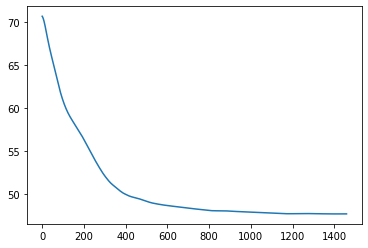

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.143844988828766
 norm of the constraint : 1.5410987498824118
Finished after 1665 iterations


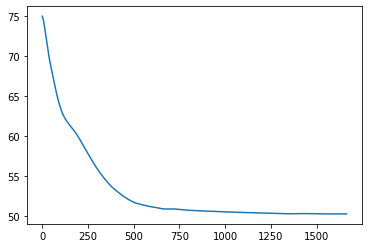

integral = tensor([[1.]])
sigma = 1, lambda = 0.3792690190732246
 norm of the constraint : 1.5399332496674758
Finished after 890 iterations


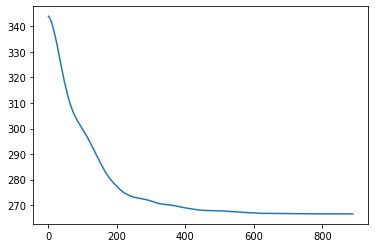

integral = tensor([[1.]])
sigma = 1, lambda = 0.3792690190732246
 norm of the constraint : 1.539551426990418
Finished after 880 iterations


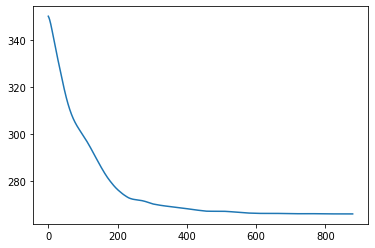

integral = tensor([[1.]])
sigma = 1, lambda = 0.3792690190732246
 norm of the constraint : 1.5405349350854882
Finished after 865 iterations


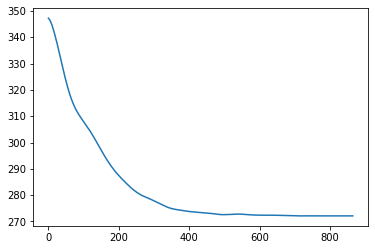

integral = tensor([[1.]])
sigma = 1, lambda = 0.3792690190732246
 norm of the constraint : 1.5380352381647036
Finished after 766 iterations


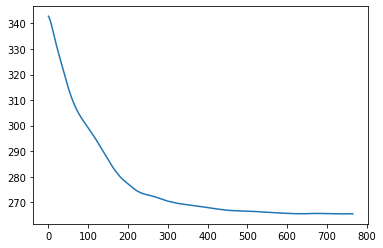

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.3792690190732246
 norm of the constraint : 1.5410987498824118
Finished after 1225 iterations


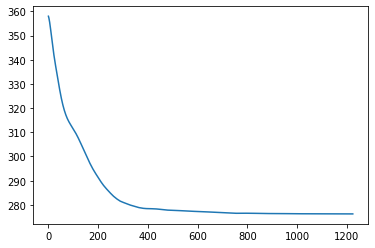

integral = tensor([[1.0000]])
sigma = 1, lambda = 1.0
 norm of the constraint : 1.5399332496674758
Finished after 515 iterations


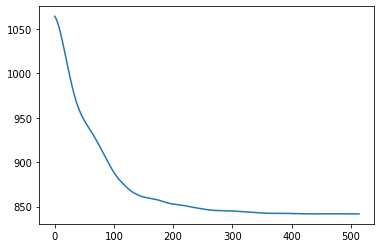

integral = tensor([[1.]])
sigma = 1, lambda = 1.0
 norm of the constraint : 1.539551426990418
Finished after 449 iterations


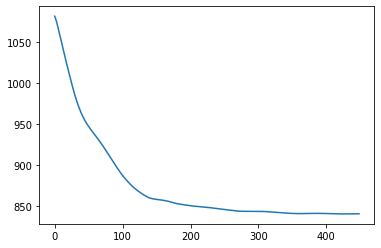

integral = tensor([[1.]])
sigma = 1, lambda = 1.0
 norm of the constraint : 1.5405349350854882
Finished after 505 iterations


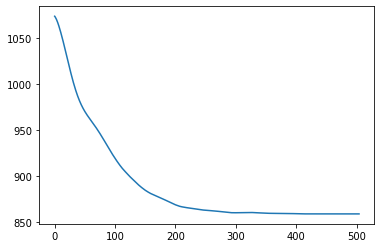

integral = tensor([[1.0000]])
sigma = 1, lambda = 1.0
 norm of the constraint : 1.5380352381647036
Finished after 445 iterations


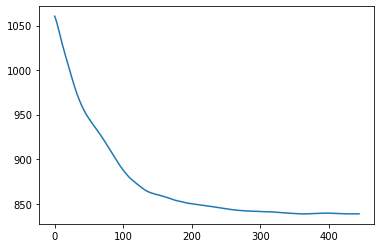

integral = tensor([[1.0000]])
sigma = 1, lambda = 1.0
 norm of the constraint : 1.5410987498824118
Finished after 715 iterations


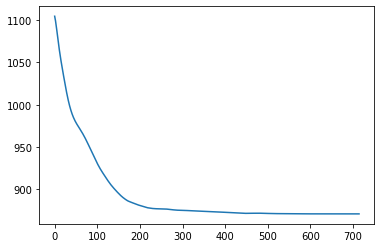

integral = tensor([[1.0000]])
sigma = 1, lambda = 4.832930238571752e-07
 norm of the constraint : 1.7215834750836223
Finished after 8185 iterations


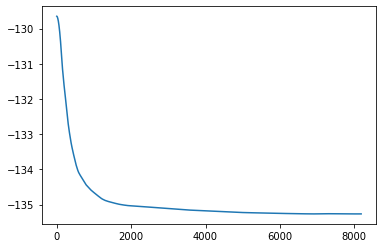

In [14]:

parameters = {'sigma' : [1], 'la' : np.logspace(-8,0,20),'Niter' : ['auto'],'mu_base' : [mu_base],'eta_base' : [eta_base]}
X = data_set
model = utils.NadarayaWatsonEstimator()
clf = GridSearchCV(model, parameters,cv = 5)
clf.fit(X)
clf_info = {'cross_valid' : clf.cv_results_,'data_set' : data_set}
version = 1
filename = f'models/nw_model_1D_{version}.pickle'
pickle.dump(clf_info, open(filename, 'wb'))

{'Niter': 'auto', 'eta_base': 5, 'la': 4.832930238571752e-07, 'mu_base': tensor([0.]), 'sigma': 1}
sigma = 1, lambda = 4.832930238571752e-07
 norm of the constraint : 1.7215834750836223
Finished after 8185 iterations


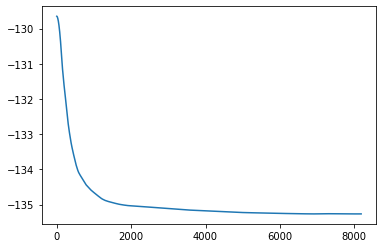

In [12]:
version = 1
filename = f'models/nw_model_1D_{version}.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
df = pd.DataFrame(loaded_model['cross_valid'])
data_set = loaded_model['data_set']
params_best = df[df['rank_test_score'] == 1].iloc[0]['params']
print(params_best)
model = utils.NadarayaWatsonEstimator(**params_best)
model.fit(data_set)

integral = tensor([[1.0000]])
integral = tensor([[1.0000]])


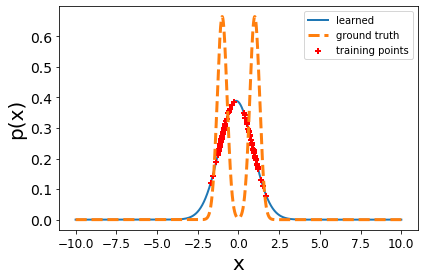

In [13]:
c,r,ntest = 0,10,100000
xtest = torch.linspace(c-r,c+r,ntest)

ytest = model.predict(xtest)
#print(ytest.sum()*(2*r)**d/ntest)
ydata_set = model.predict(data_set)
ytestref = density_fun(xtest)

fig = plt.figure()
plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
plt.scatter(data_set,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=1000)
plt.show()

# GLMS 

In [ ]:
version = find_last_version(path = 'models/glm_model_1D',extension = 'pickle')

print(f'last version number : {version}')

In [ ]:
parameters = {'sigma' : [1], 'la' : np.logspace(-8,0,20),'Niter' : ['auto'],'mu_base' : [mu_base],'eta_base' : [eta_base]}
X = data_set
model = utils.ExpoEstimator()
clf = GridSearchCV(model, parameters,cv = 5)
clf.fit(X)
clf_info = {'cross_valid' : clf.cv_results_,'data_set' : data_set}
version = 1
filename = f'models/glm_model_1D_{version}.pickle'
pickle.dump(clf_info, open(filename, 'wb'))

In [ ]:
version = 1
filename = f'models/glm_model_1D_{version}.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
df = pd.DataFrame(loaded_model['cross_valid'])
data_set = loaded_model['data_set']
params_best = df[df['rank_test_score'] == 1].iloc[0]['params']
print(params_best)
model = utils.ExpoEstimator(**params_best)
model.fit(data_set)

In [ ]:
c,r,ntest = 0,10,100000
xtest = torch.linspace(c-r,c+r,ntest)

ytest = model.predict(xtest)
#print(ytest.sum()*(2*r)**d/ntest)
ydata_set = model.predict(data_set)
ytestref = density_fun(xtest)

fig = plt.figure()
plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
plt.scatter(data_set,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=1000)
plt.show()